## Conbined code for flu data analysis

### Author: 
Tao Shan, Xiaonan Liu, Yaochen Xiao, Sijie Chen

### Description:
* flu data analysis

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
tqdm.pandas()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
DIR_PATH = ""
DIR_PATH = "/content/drive/MyDrive/841 project/code/final report submission/Saved_Parameters"
DIR_PATH_Plot = "/content/drive/MyDrive/841 project/code/final report submission/Saved_Plots"

In [2]:
# os.chdir(DIR_PATH)
DIR_PATH = ""
df = pd.read_csv(
    os.path.join(DIR_PATH, f"H1N1_Flu_Vaccines.csv")
)
df.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...  rent_or_own   employment_status  \
0                    1.0  ...          Own  Not in Labor Force   
1                    1.0  ...         Rent            Employed   
2                    0.0  ...          Own            Employed   
3                    0.0  ...         Rent  Not in Labor Force   
4                    1.0  ...          Own            Employed   

   hhs_geo_region                census_msa  household_adults  \
0        oxchjgsf                   Non-MSA               0.0   
1        bhuqouqj  MSA, Not Principle  City               0.0   
2        qufhixun  MSA, Not Principle  City               2.0   
3        lrircsnp       MSA, Principle City               0.0   
4        qufhixun  MSA, Not Principle  City               1.0   

   household_children  employment_industry  employment_occupation  \
0                 0.0                  NaN                    NaN   
1                 0.0             pxcmvdjn               xgwztkwe   
2                 0.0             rucpziij               xtkaffoo   
3                 0.0                  NaN                    NaN   
4                 0.0             wxleyezf               emcorrxb   

   h1n1_vaccine  seasonal_vaccine  
0             0                 0  
1             0                 1  
2             0                 0  
3             0                 1  
4             0                 0  

[5 rows x 38 columns]

In [ ]:
df.iloc[0:5,10:20]

doctor_recc_h1n1  doctor_recc_seasonal  chronic_med_condition  \
0               0.0                   0.0                    0.0   
1               0.0                   0.0                    0.0   
2               NaN                   NaN                    1.0   
3               0.0                   1.0                    1.0   
4               0.0                   0.0                    0.0   

   child_under_6_months  health_worker  health_insurance  \
0                   0.0            0.0               1.0   
1                   0.0            0.0               1.0   
2                   0.0            0.0               NaN   
3                   0.0            0.0               NaN   
4                   0.0            0.0               NaN   

   opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0                          3.0                1.0   
1                          5.0                4.0   
2                          3.0                1.0   
3                          3.0                3.0   
4                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  
0                          2.0                          2.0  
1                          4.0                          4.0  
2                          1.0                          4.0  
3                          5.0                          5.0  
4                          2.0                          3.0

In [ ]:
df.iloc[0:5,20:30]

opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
0                1.0                          2.0  55 - 64 Years   
1                2.0                          4.0  35 - 44 Years   
2                1.0                          2.0  18 - 34 Years   
3                4.0                          1.0      65+ Years   
4                1.0                          4.0  45 - 54 Years   

          education   race     sex             income_poverty marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  rent_or_own   employment_status  
0         Own  Not in Labor Force  
1        Rent            Employed  
2         Own            Employed  
3        Rent  Not in Labor Force  
4         Own            Employed

In [ ]:
df.iloc[0:5,30:40]

hhs_geo_region                census_msa  household_adults  \
0       oxchjgsf                   Non-MSA               0.0   
1       bhuqouqj  MSA, Not Principle  City               0.0   
2       qufhixun  MSA, Not Principle  City               2.0   
3       lrircsnp       MSA, Principle City               0.0   
4       qufhixun  MSA, Not Principle  City               1.0   

   household_children employment_industry employment_occupation  h1n1_vaccine  \
0                 0.0                 NaN                   NaN             0   
1                 0.0            pxcmvdjn              xgwztkwe             0   
2                 0.0            rucpziij              xtkaffoo             0   
3                 0.0                 NaN                   NaN             0   
4                 0.0            wxleyezf              emcorrxb             0   

   seasonal_vaccine  
0                 0  
1                 1  
2                 0  
3                 1  
4                 0

# Data Cleanning

*   filling all missing values and removing redundant data, including categorical, numerical features
*   visualize missing values by the dendrogram
*   Filling methods: MICE, Mode + Groupby


In [ ]:
# Null value counts
df.isnull().sum().sort_values(ascending = False)/df.shape[0]

employment_occupation          0.504362
employment_industry            0.499120
health_insurance               0.459580
income_poverty                 0.165612
doctor_recc_h1n1               0.080878
doctor_recc_seasonal           0.080878
rent_or_own                    0.076459
employment_status              0.054780
marital_status                 0.052720
education                      0.052683
chronic_med_condition          0.036358
child_under_6_months           0.030704
health_worker                  0.030104
opinion_seas_sick_from_vacc    0.020107
opinion_seas_risk              0.019246
opinion_seas_vacc_effective    0.017299
opinion_h1n1_sick_from_vacc    0.014790
opinion_h1n1_vacc_effective    0.014640
opinion_h1n1_risk              0.014528
household_adults               0.009323
household_children             0.009323
behavioral_avoidance           0.007788
behavioral_touch_face          0.004793
h1n1_knowledge                 0.004343
h1n1_concern                   0.003445


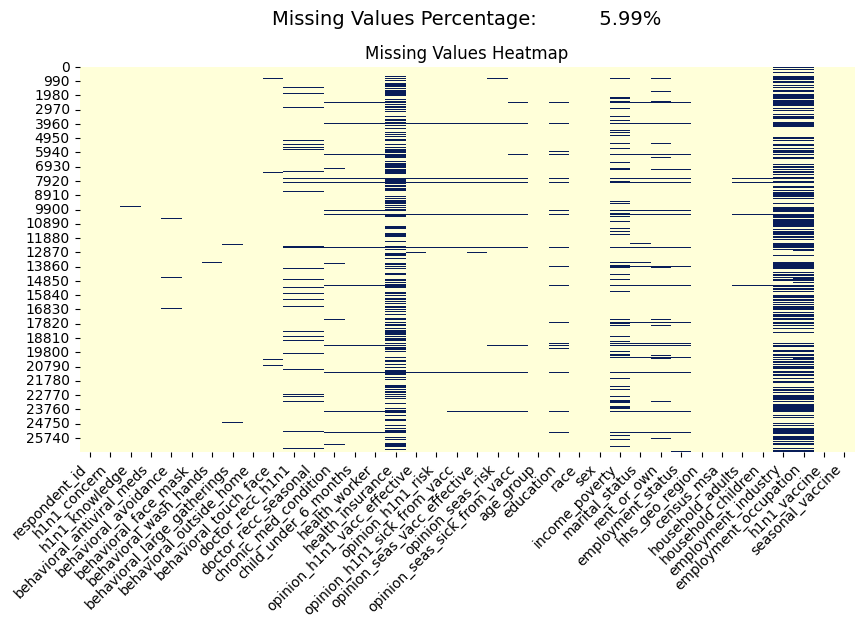

In [ ]:
# Total Missing Percentage
missing_percentage = round(df.isnull().sum().sum() / df.size * 100, 2)

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='YlGnBu', cbar=False)
plt.text(x=0.5, y=1.1, s=f"Missing Values Percentage: \
         {missing_percentage}%", fontsize=14, ha='center', \
         va='bottom', transform=plt.gca().transAxes)
plt.xticks(rotation=45, ha='right')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
df.nunique().sort_values(ascending = False)[0:5]

respondent_id                  26707
employment_occupation             23
employment_industry               21
hhs_geo_region                    10
opinion_h1n1_vacc_effective        5
dtype: int64

which means all columns are categorical type. And respondent_id should be deleted

In [ ]:
df.drop(['respondent_id'], axis = 1,inplace = True)

In [ ]:
missing_counts = df.isnull().sum().sort_values(ascending = False)/df.shape[0]
missing_large = missing_counts[missing_counts>0.4].index.tolist()
missing_low = missing_counts[(missing_counts<0.4)&(missing_counts>0)].index.tolist()
missing = missing_counts.index.tolist()

In [ ]:
# remove rows which has large portion of missing values
missing_prop = df.isna().mean(axis=1)
df = df[missing_prop <= 0.5]

When missing precentage > 0.4, generate an indicator to show the column is missing, also delete this column.



In [ ]:
for col in missing_large:
    df[col+'NAN'] = df[col].isna()
    df.drop(col, axis = 1, inplace = True)

<ipython-input-13-bcb443ebc330>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col+'NAN'] = df[col].isna()
<ipython-input-13-bcb443ebc330>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(col, axis = 1, inplace = True)
<ipython-input-13-bcb443ebc330>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col+'NAN'

In [ ]:
df[missing_low].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26515 entries, 0 to 26706
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   income_poverty               22284 non-null  object 
 1   doctor_recc_h1n1             24507 non-null  float64
 2   doctor_recc_seasonal         24507 non-null  float64
 3   rent_or_own                  24665 non-null  object 
 4   employment_status            25244 non-null  object 
 5   marital_status               25299 non-null  object 
 6   education                    25300 non-null  object 
 7   chronic_med_condition        25736 non-null  float64
 8   child_under_6_months         25887 non-null  float64
 9   health_worker                25903 non-null  float64
 10  opinion_seas_sick_from_vacc  26170 non-null  float64
 11  opinion_seas_risk            26192 non-null  float64
 12  opinion_seas_vacc_effective  26244 non-null  float64
 13  opinion_h1n1_sic

Filling by MICE for numerical data

In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 14.8 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29898 sha256=99c3438d5fce6a1bcb28b2b9b0991faf5a756cfae5c50d44cb50e4cb7d6b080f
  Stored in directory: /root/.cache/pip/wheels/f9/fc/6a/b0406b906bce293abe23c3b6da5a72637d2d04146ef1125a0b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11352 sha256=1d99129e42e2b7d10a594a0175d1cddf0720eba5430b6774bb2e118b7300c376
  Stored in directory: /root/.cache/pip/wheels/88/c4/be/e232c750d9bc360abf9a5e2cafe0d3e08e3605d2801bb11684
Successfully built fancyimpute knnimpute


In [ ]:
from fancyimpute import IterativeImputer

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

In [ ]:
# MICE
imputer = IterativeImputer()
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

For categorical columns, use group by with other non-missing categorical columns, then filling missing value by mode of each groups.

In [ ]:
def fillna_by_mode(group):
    return group.fillna(group.mode().iloc[0])

non_missing_cols = ['sex', 'race', 'age_group', 'hhs_geo_region']
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
df[cat_cols] = df[cat_cols].groupby(non_missing_cols, as_index=False).apply(fillna_by_mode)

<ipython-input-19-0413e47ee308>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[cat_cols] = df[cat_cols].groupby(non_missing_cols, as_index=False).apply(fillna_by_mode)


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26510 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26510 non-null  float64
 1   h1n1_knowledge               26510 non-null  float64
 2   behavioral_antiviral_meds    26510 non-null  float64
 3   behavioral_avoidance         26510 non-null  float64
 4   behavioral_face_mask         26510 non-null  float64
 5   behavioral_wash_hands        26510 non-null  float64
 6   behavioral_large_gatherings  26510 non-null  float64
 7   behavioral_outside_home      26510 non-null  float64
 8   behavioral_touch_face        26510 non-null  float64
 9   doctor_recc_h1n1             26510 non-null  float64
 10  doctor_recc_seasonal         26510 non-null  float64
 11  chronic_med_condition        26510 non-null  float64
 12  child_under_6_months         26510 non-null  float64
 13  health_worker   

# Data Exploration

*   correlation, histogram, box plot, pie chart, skewness plot


[]

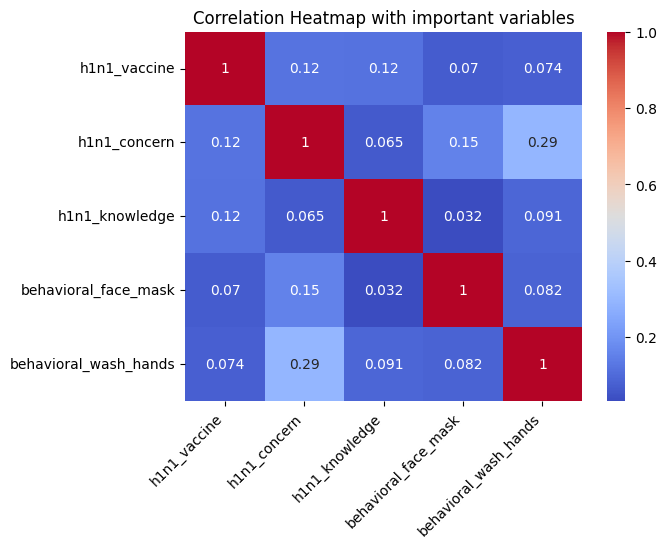

In [ ]:
# Correlation
cols = ['h1n1_vaccine','h1n1_concern','h1n1_knowledge','behavioral_face_mask','behavioral_wash_hands']
corr_matrix = df[cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap with important variables')
# save picture
plt.savefig('Correlation Heatmap with important variables.png')
plt.plot()

In [ ]:
df.corr()['h1n1_vaccine'].sort_values(ascending = False)[1:]

<ipython-input-23-7bf60757d51a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['h1n1_vaccine'].sort_values(ascending = False)[1:]


doctor_recc_h1n1               0.399067
seasonal_vaccine               0.377002
opinion_h1n1_risk              0.323591
opinion_h1n1_vacc_effective    0.270018
opinion_seas_risk              0.259137
doctor_recc_seasonal           0.213150
opinion_seas_vacc_effective    0.179546
health_worker                  0.171445
h1n1_concern                   0.122427
h1n1_knowledge                 0.118453
chronic_med_condition          0.096593
opinion_h1n1_sick_from_vacc    0.075237
behavioral_wash_hands          0.074089
behavioral_touch_face          0.071425
behavioral_face_mask           0.069531
child_under_6_months           0.067680
behavioral_avoidance           0.047439
behavioral_antiviral_meds      0.039079
behavioral_outside_home        0.021609
behavioral_large_gatherings    0.017578
opinion_seas_sick_from_vacc    0.008274
household_adults               0.007079
household_children            -0.003448
employment_occupationNAN      -0.008993
employment_industryNAN        -0.011442


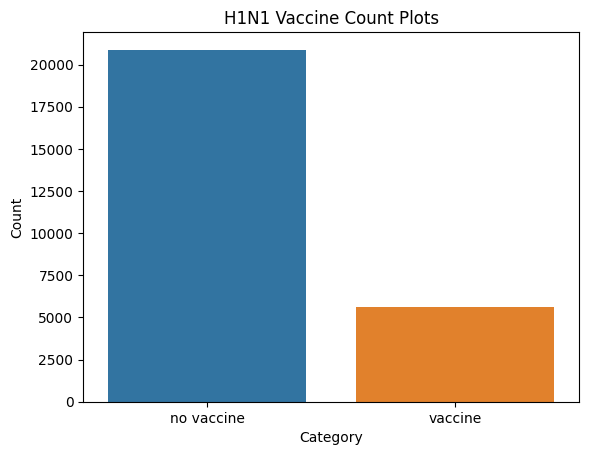

In [ ]:
# Count Plots
# Check Imbalance
ax = sns.countplot(x="h1n1_vaccine", data=df)
ax.set_xticklabels(['no vaccine','vaccine'])
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("H1N1 Vaccine Count Plots")
# save picture
plt.savefig('H1N1 Vaccine Count Plots.png')
plt.show()

In [ ]:
df['vaccination_status'] = df['h1n1_vaccine'].map({0: 'no vaccine', 1: 'vaccine'})

In [ ]:
df['age_group']

0        55 - 64 Years
1        35 - 44 Years
2        18 - 34 Years
3            65+ Years
4        45 - 54 Years
             ...      
26702        65+ Years
26703    18 - 34 Years
26704    55 - 64 Years
26705    18 - 34 Years
26706        65+ Years
Name: age_group, Length: 26510, dtype: object

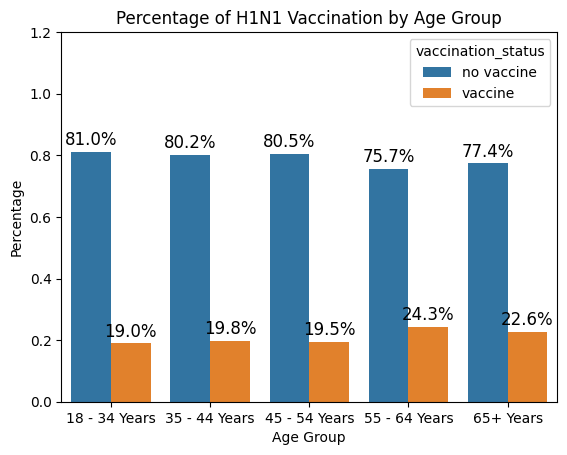

In [ ]:
# Check Percentage of H1N1 Vaccination by Age Group
df_count = df.groupby(['age_group', 'vaccination_status']).size().reset_index(name='count')
total_counts = df_count.groupby('age_group')['count'].transform('sum')
df_count['percentage'] = df_count['count'] / total_counts

ax = sns.barplot(x='age_group', y='percentage', hue='vaccination_status', data=df_count)

plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.title('Percentage of H1N1 Vaccination by Age Group')

for p in ax.patches:
    if p.get_bbox().y1 != 0:
        ax.annotate(
            f"{p.get_height():.1%}", 
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', 
            va='baseline', 
            fontsize=12, 
            color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )
plt.ylim(0,1.2)
# save picture
plt.savefig('Percentage of H1N1 Vaccination by Age Group.png')
# Show the plot
plt.show()

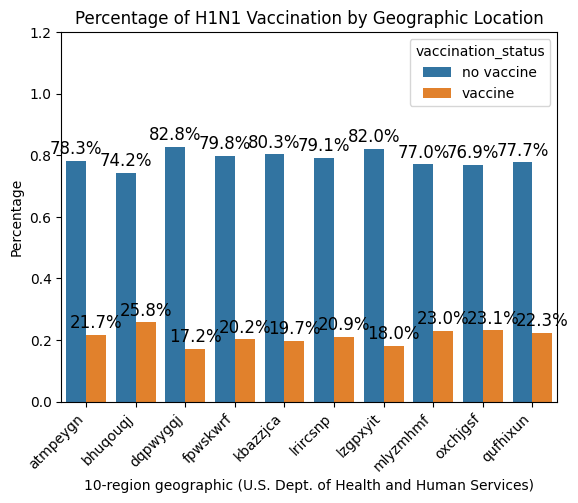

In [ ]:
# Check Percentage of H1N1 Vaccination by Geographic Location
df_count = df.groupby(['hhs_geo_region', 'vaccination_status']).size().reset_index(name='count')
total_counts = df_count.groupby('hhs_geo_region')['count'].transform('sum')
df_count['percentage'] = df_count['count'] / total_counts

ax = sns.barplot(x='hhs_geo_region', y='percentage', hue='vaccination_status', data=df_count)

plt.ylabel('Percentage')
plt.xlabel('10-region geographic (U.S. Dept. of Health and Human Services)')
plt.title('Percentage of H1N1 Vaccination by Geographic Location')

for p in ax.patches:
    if p.get_bbox().y1 != 0:
        ax.annotate(
            f"{p.get_height():.1%}", 
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', 
            va='baseline', 
            fontsize=12, 
            color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )
plt.ylim(0,1.2)
plt.xticks(rotation=45, ha='right')
# save picture
plt.savefig('Percentage of H1N1 Vaccination by Geographic Location.png')
# Show the plot
plt.show()

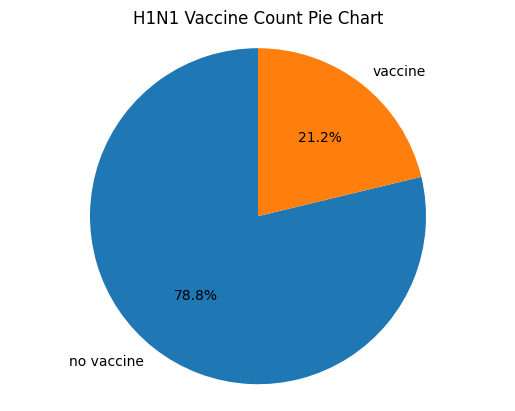

In [ ]:
# Pie chart of H1N1 Vaccine Count
counts = df['h1n1_vaccine'].value_counts()
labels = ['no vaccine', 'vaccine']

plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("H1N1 Vaccine Count Pie Chart")

# save picture
plt.savefig('H1N1 Vaccine Count Pie Chart.png')

# Show the plot
plt.show()

In [ ]:
df.drop(['vaccination_status'],axis = 1, inplace = True)

find outliers in categorical columns by rare categories

In [ ]:
threshold_percentage = 0.01

# Find rare categories in each categorical column
for col in tqdm(df.columns):
    value_counts = df[col].value_counts(normalize=True)
    rare_categories = value_counts[value_counts < threshold_percentage].index
    if rare_categories.values.tolist() != []:
        df = df[~df[col].isin(rare_categories)]
        print(f"Rare categories in column '{col}': {list(rare_categories)}")
df.shape

  0%|          | 0/37 [00:00<?, ?it/s]

Rare categories in column 'h1n1_concern': [1.4054728243025552, 0.7757216954628325, 2.3579904346476983, 1.9596064041680543, 1.6442561637864024, 1.3017275836991187, 2.1273849720758253, 1.3380711554136289, 1.3070204196371997, 1.8564209275105659, 1.6792385189222174, 1.740239486715635, 1.7570581296500232, 1.7251240637152603, 1.39433244810534, 1.8500342681427757, 0.712844647385423, 1.530769485368759, 1.5699767684836718, 1.4821521379322369, 1.0096254175423622, 1.738680746961089, 1.5681438195895838, 1.1903962689903926, 1.2601484045389877, 0.5811097414830738, 1.6347945006605265, 1.8985039380965552, 1.233917499298682, 2.6997884024468233, 1.118230378621169, 1.7323130700599987, 1.0451209113567195, 1.2501682190309167, 1.2681898254602797, 1.1473882908205304, 0.7162624540536331, 1.7494517647674723, 1.5549926351054613, 0.5075135422406247, 1.5990658423897715, 0.9488477050802775, 2.3805146452415373, 0.9424453159347566, 1.6899156863416729, 1.5473392961932577, 1.5093006473312298, 1.5848426402790454, 1.920

(22832, 37)

# Feature Generation

By domain knowledge:

* Age Group & Chronic Medical Condition Interaction: Older people with chronic medical conditions might have different vaccination behavior than others.
* Healthcare Worker & Health Insurance Interaction: Healthcare workers with health insurance might have different vaccination behavior than others
* Opinion Differences: differences between opinions on H1N1 and seasonal flu vaccines
* Total Household Members: represents the total number of people in the household
* Child in Household: indicates if there is at least one child in the household

In [ ]:
df['age_chronic_condition'] = df['age_group'].astype(str) + '_' + df['chronic_med_condition'].astype(str)
#df['health_worker_insurance'] = df['health_worker'].astype(str) + '_' + df['health_insurance'].astype(str)
df['opinion_vacc_effective_diff'] = df['opinion_h1n1_vacc_effective'] - df['opinion_seas_vacc_effective']
df['opinion_risk_diff'] = df['opinion_h1n1_risk'] - df['opinion_seas_risk']
df['opinion_sick_from_vacc_diff'] = df['opinion_h1n1_sick_from_vacc'] - df['opinion_seas_sick_from_vacc']
df['total_household_members'] = df['household_adults'] + df['household_children']
df['child_in_household'] = (df['household_children'] > 0).astype(int)

# Data Preprocessing
*   Encoder (one-hot, label, frequency, ordinal encoding）
*   Scaler (min-max, normalize)
*   Consider imbalanced datasets (SMOTE)
*   Consider Dimensional Reduction (PCA, SVD, T-SNE)


In [ ]:
df['age_group'].unique()

array(['55 - 64 Years', '35 - 44 Years', '65+ Years', '45 - 54 Years',
       '18 - 34 Years'], dtype=object)

In [ ]:
age_dict = {'18 - 34 Years':0,'35 - 44 Years':1,'45 - 54 Years':2,'55 - 64 Years':3,'65+ Years':4}
df['age_group'] = df['age_group'].map(age_dict)

In [ ]:
df['education'].unique()

array(['< 12 Years', '12 Years', 'Some College', 'College Graduate'],
      dtype=object)

In [ ]:
edu_dict = {'< 12 Years':0,'12 Years':1,'Some College':2,'College Graduate':3}
df['education'] = df['education'].map(edu_dict)

In [ ]:
# ordinal categorical variables
ordinal_cols = ['opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc'\
                ,'opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc',
               'household_adults','household_children','h1n1_concern','h1n1_knowledge', \
                'total_household_members','opinion_vacc_effective_diff','opinion_risk_diff',\
               'opinion_sick_from_vacc_diff']
df[ordinal_cols].head()

opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0                          3.0                1.0   
1                          5.0                4.0   
3                          3.0                3.0   
4                          3.0                3.0   
5                          5.0                2.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          2.0   
1                          4.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   
5                          1.0                          5.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
0                1.0                          2.0               0.0   
1                2.0                          4.0               0.0   
3                4.0                          1.0               0.0   
4                1.0                          4.0               1.0   
5                4.0                          4.0               2.0   

   household_children  h1n1_concern  h1n1_knowledge  total_household_members  \
0                 0.0           1.0             0.0                      0.0   
1                 0.0           3.0             2.0                      0.0   
3                 0.0           1.0             1.0                      0.0   
4                 0.0           2.0             1.0                      1.0   
5                 3.0           3.0             1.0                      5.0   

   opinion_vacc_effective_diff  opinion_risk_diff  opinion_sick_from_vacc_diff  
0                          1.0                0.0                          0.0  
1                          1.0                2.0                          0.0  
3                         -2.0               -1.0                          4.0  
4                          0.0                2.0                         -2.0  
5                          0.0               -2.0                         -3.0

In [ ]:
# other columns
# ignore columns age_group, education, vaccination_status
unique_count = df.nunique().sort_values(ascending = False)
one_hot_cols = unique_count[unique_count<7].index.tolist()
frequency_encode_cols = unique_count[unique_count>=7].index.tolist()
one_hot_cols = [col for col in one_hot_cols if col not in ordinal_cols+['age_group','education','h1n1_vaccine']]

one-hot encoding

In [ ]:
df['behavioral_face_mask'].nunique()

2

In [ ]:
pd.get_dummies(df['behavioral_face_mask'], prefix='behavioral_face_mask')

behavioral_face_mask_0.0  behavioral_face_mask_1.0
0                             1                         0
1                             1                         0
3                             1                         0
4                             1                         0
5                             1                         0
...                         ...                       ...
26701                         1                         0
26702                         1                         0
26703                         1                         0
26704                         0                         1
26706                         1                         0

[22832 rows x 2 columns]

I want to ignore the excluding the least frequent label in each column in one-hot encoding

In [ ]:
for col in tqdm(one_hot_cols):
    least_frequent_label = df[col].value_counts().idxmin()
    df[col] = df[col].replace(least_frequent_label, np.nan)

# Perform one-hot encoding, ignoring the NaN values introduced in the previous step
df = pd.get_dummies(df, columns=one_hot_cols, dummy_na=False)

  0%|          | 0/24 [00:00<?, ?it/s]

frequency encoding

In [ ]:
# for col in frequency_encode_cols:
#     # using frequency encoding
#     freq_encoding = df[col].value_counts()
#     df[col] = df[col].map(freq_encoding)

target encoding

In [ ]:
for col in frequency_encode_cols:
    target_encoding = df.groupby(col)['h1n1_vaccine'].mean()
    df[col] = df[col].map(target_encoding)

Min-max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
feature_columns = [col for col in df.columns if col != 'h1n1_vaccine']
scaler = MinMaxScaler()
df[feature_columns] = scaler.fit_transform(df[feature_columns])

# Feature Selection 

* Statistical Methods
* Forward & Backward
* Tree-based methods
* Feature interactions


In [ ]:
df.head()

h1n1_concern  h1n1_knowledge  opinion_h1n1_vacc_effective  \
0      0.333333             0.0                          0.5   
1      1.000000             1.0                          1.0   
3      0.333333             0.5                          0.5   
4      0.666667             0.5                          0.5   
5      1.000000             0.5                          1.0   

   opinion_h1n1_risk  opinion_h1n1_sick_from_vacc  \
0               0.00                         0.25   
1               0.75                         0.75   
3               0.50                         1.00   
4               0.50                         0.25   
5               0.25                         0.00   

   opinion_seas_vacc_effective  opinion_seas_risk  \
0                         0.25               0.00   
1                         0.75               0.25   
3                         1.00               0.75   
4                         0.50               0.00   
5                         1.00               0.75   

   opinion_seas_sick_from_vacc  age_group  education  ...  \
0                         0.25       0.75   0.000000  ...   
1                         0.75       0.25   0.333333  ...   
3                         0.00       1.00   0.333333  ...   
4                         0.75       0.50   0.666667  ...   
5                         0.75       1.00   0.333333  ...   

   behavioral_outside_home_0.0  health_worker_0.0  doctor_recc_h1n1_0.0  \
0                          0.0                1.0                   1.0   
1                          0.0                1.0                   1.0   
3                          1.0                1.0                   1.0   
4                          1.0                1.0                   1.0   
5                          1.0                1.0                   1.0   

   rent_or_own_Own  marital_status_Married  sex_Female  \
0              1.0                     0.0         1.0   
1              0.0                     0.0         0.0   
3              0.0                     0.0         1.0   
4              1.0                     1.0         1.0   
5              1.0                     1.0         0.0   

   doctor_recc_seasonal_0.0  chronic_med_condition_0.0  \
0                       1.0                        1.0   
1                       1.0                        1.0   
3                       0.0                        0.0   
4                       1.0                        1.0   
5                       0.0                        1.0   

   child_under_6_months_0.0  child_in_household_0.0  
0                       1.0                     1.0  
1                       1.0                     1.0  
3                       1.0                     1.0  
4                       1.0                     1.0  
5                       1.0                     0.0  

[5 rows x 48 columns]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.drop(columns=['h1n1_vaccine'])
y = df['h1n1_vaccine']

selector = SelectKBest(chi2, k='all')
selector.fit(X, y)
feature_scores = selector.scores_

feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False).reset_index()
print(feature_scores_df)

    index                                   Feature        Score
0      35                      seasonal_vaccine_0.0  1603.900250
1       3                         opinion_h1n1_risk   833.720073
2      39                      doctor_recc_h1n1_0.0   785.585296
3       6                         opinion_seas_risk   470.242722
4      32                 health_insuranceNAN_False   407.325284
5      43                  doctor_recc_seasonal_0.0   333.337710
6       2               opinion_h1n1_vacc_effective   149.084779
7      13                     age_chronic_condition    91.471147
8      38                         health_worker_0.0    83.639338
9       5               opinion_seas_vacc_effective    75.469625
10      0                              h1n1_concern    67.271777
11     44                 chronic_med_condition_0.0    67.240676
12     14               opinion_vacc_effective_diff    62.313437
13      4               opinion_h1n1_sick_from_vacc    53.081436
14     18                

In [ ]:
threshold = 0.1
drop_feature = feature_scores_df[feature_scores_df['Score']<threshold]['Feature'].values.tolist()
df.drop(drop_feature, axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22832 entries, 0 to 26706
Data columns (total 44 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   h1n1_concern                              22832 non-null  float64
 1   h1n1_knowledge                            22832 non-null  float64
 2   opinion_h1n1_vacc_effective               22832 non-null  float64
 3   opinion_h1n1_risk                         22832 non-null  float64
 4   opinion_h1n1_sick_from_vacc               22832 non-null  float64
 5   opinion_seas_vacc_effective               22832 non-null  float64
 6   opinion_seas_risk                         22832 non-null  float64
 7   opinion_seas_sick_from_vacc               22832 non-null  float64
 8   age_group                                 22832 non-null  float64
 9   education                                 22832 non-null  float64
 10  hhs_geo_region                    

In [ ]:
# save the cleaned dataset to a CSV file
df.to_csv('cleaned_flu.csv', index=False)

# Modelling
* Split train/test set or cross-validation, or nested cross-validation
* Some models in the class: Logistic Regression, Random Forest, Bagging, Gradient Boosting
* Some models outside the class: Xgboost, LSTM, MLP Classifier, Transfer learning
* Ensemble: model stacking
* Tuning parameters


In [3]:
# load the cleaned dataset from the CSV file
cleaned_df = pd.read_csv('cleaned_flu.csv')
df = cleaned_df

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('h1n1_vaccine', axis=1), # features
    df['h1n1_vaccine'], # target variable
    test_size=0.2, # 20% of data for testing
    random_state=42) # random state for reproducibility

## Useful Functions

In [5]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

# eval_model: evaluates a classification model by calculating 
# # various performance metrics and displaying a confusion matrix.
def eval_model():
  '''
  Evaluation the model by confusion matrix
  '''
  # pred_proba
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
  auc_roc = metrics.auc(fpr, tpr)
  
  # probas_pred
  precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred_proba)
  auc_pr = metrics.auc(recall, precision)

  # y_preds: Predicted labels, as returned by a classifier.
  model_accuracy = accuracy_score(y_test,y_preds)
  
  # y_preds: Estimated targets as returned by a classifier.
  report = classification_report(y_test, y_preds)
  

  print(f"ROC-AUC= {auc_roc} \n PR-AUC= {auc_pr} \n accuracy= {model_accuracy} \n report {report} " )

  cm = confusion_matrix(y_test, y_preds)
  print(f"confusion matrix: \n {cm}")

In [6]:
# ROC curves with K-fold cross validation

from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold

def rocCurveKCV(model_name, classifier, X, y, n_splits=10):
    '''
    ROC-AUC curve for each fold in a stratified k-fold cross-validation setting
    
    Args:
        model_name: classifier's name
        classifier: input classifier
        X: input train data
        y: target labels
        n_splits: the number of splits of data

    Returns:
        a StratifiedKFold cross-validator and calculates true positive rates 
            (tprs) and AUC scores (aucs) for each fold.
        plots the ROC curve for each fold and the mean ROC curve with its standard deviation
        displays the chance curve (diagonal line) and the shaded region representing +/- 1 standard deviation
    '''
    cv = StratifiedKFold(n_splits=n_splits)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(6, 6))
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X.iloc[train], y.iloc[train])
        viz = RocCurveDisplay.from_estimator(classifier, X.iloc[test], y.iloc[test],
                                             name='ROC fold {}'.format(i),
                                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic")
    ax.legend(loc="lower right")

#     fig.set_size_inches(8,6)
    plt.savefig(f'{model_name}_roc_cv.png', format='png')
    plt.show()

In [7]:
import numpy as np
import pandas as pd
import xgboost as xgb
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

def plot_param_each_fold(model_name, params, param_name, base_classifier, X_train, y_train):
    """
    input: 
        model_name: the name of the model
        params: a dictionary containing the parameters for the base classifier, where the parameter to be varied is specified as a list.
        param_name: a string indicating the name of the parameter to be varied.
        base_classifier: a class or function that represents the base classifier.
        X_train: a Pandas DataFrame or NumPy array containing the training data.
        y_train: a Pandas Series or NumPy array containing the target values for the training data.

    output:
        plot of the ROC-AUC score versus the specified parameter value. 
    """
    param = params[param_name]
    roc_auc_scores = []
    roc_auc_scores_folds = []
    
    for param_value in tqdm(param):
        params[param_name] = param_value
        classifier = base_classifier(**params)
        cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='roc_auc')
        roc_auc = np.mean(cv_scores)
        roc_auc_scores.append(roc_auc)
        roc_auc_scores_folds.append(cv_scores)
    roc_auc_scores_folds = np.array(roc_auc_scores_folds)

    print("Best parameter is ", param[roc_auc_scores.index(max(roc_auc_scores))])

    for fold_idx in range(roc_auc_scores_folds.shape[1]):
        plt.plot(param, roc_auc_scores_folds[:, fold_idx], alpha=0.3, label=f'Fold {fold_idx + 1}')

    # Plot the average ROC-AUC score
    plt.plot(param, roc_auc_scores, linewidth=2, color='black', label='Average')

    plt.xlabel(f'{param_name}')
    plt.ylabel('ROC-AUC score')
    plt.title(f'{model_name} ROC-AUC score vs {param_name}')
    plt.legend()
    plt.savefig(f'{model_name} ROC-AUC score vs {param_name}')
    plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV, KFold

def plot_cv_error_per_foldM(grid_cv, param_range, param_name, train, label, cv=5):
    '''
    plot CV error for per fold and average parallel version
    Input:
      grid_cv: estimator instance
      param_range: parameter values to be explored
      param_name: name of parameter
      train: training features
      label: target
      cv: number of folds
    Output:
      CV error for per fold and average

    '''
    # Create a range of values for the specified parameter
    # param_range = np.arange(1, 25)

    # Create a dictionary for the parameter grid
    param_grid = {param_name: param_range}

    # Perform a grid search with cross-validation
    cv_folds = KFold(n_splits=cv)
    grid_search = GridSearchCV(grid_cv, param_grid, cv=cv_folds, scoring='accuracy', return_train_score=True,
                              verbose=10,
                              n_jobs=6)
    grid_search.fit(train, label)

    # Get the test scores for each parameter value and each fold
    split_test_scores = np.array([grid_search.cv_results_[f'split{i}_test_score'] for i in range(cv)]).T

    cv_loss = 1 - split_test_scores

    # Plot the error curve per fold
    plt.figure(figsize=(8, 6))
    for i in range(cv):
        plt.plot(param_range, cv_loss[:, i], alpha=0.3, label=f'Fold {i+1} Error')

    # Plot the average ROC-AUC score
    plt.plot(param_range, np.mean(cv_loss, axis=1), linewidth=2, color='black', label='Average')
    
    plt.xlabel(f'{param_name}')
    plt.ylabel('CV Error')
    plt.legend()
    plt.title(f'CV Error per Fold vs. {param_name}')
    plt.savefig(f'CV-error vs {param_name}')
    plt.show()


In [9]:
def plot_param_each_foldM(params, param_name, base_classifier, X_train, y_train): # parallel version
    param = params[param_name]
    roc_auc_scores = []
    roc_auc_scores_folds = []
    
    for param_value in param:
        params[param_name] = param_value
        classifier = base_classifier(**params)
        cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='roc_auc',
                                   verbose=0,
                                   n_jobs=6)
        roc_auc = np.mean(cv_scores)
        roc_auc_scores.append(roc_auc)
        roc_auc_scores_folds.append(cv_scores)
    roc_auc_scores_folds = np.array(roc_auc_scores_folds)

    plt.figure(figsize=(8, 6))
    for fold_idx in range(roc_auc_scores_folds.shape[1]):
        plt.plot(param, roc_auc_scores_folds[:, fold_idx], alpha=0.3, label=f'Fold {fold_idx + 1}')

    # Plot the average ROC-AUC score
    plt.plot(param, roc_auc_scores, linewidth=2, color='black', label='Average')

    plt.xlabel(f'{param_name}')
    plt.ylabel('ROC-AUC score')
    plt.title(f'ROC-AUC score vs {param_name}')
    plt.legend()
    plt.savefig(f'ROC-AUC score vs {param_name}')
    plt.show()

In [10]:
import seaborn as sns

def plot_feature_importance(importance,names,model_type):
    '''
    feature importance plot function for random forest
    '''
    #Create a DataFrame combining importance and column names
    scores = pd.DataFrame({'feature_names':names,'feature_importance':importance})
    scores.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    scores = scores.head(10) # best of 10
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=scores['feature_importance'], y=scores['feature_names'])
    #Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.gcf().set_size_inches(6, 5)
    plt.savefig(f'{model_type} Feature Importance')

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def SVM_model_performance(clf, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test):
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy:', accuracy)
    decision_values = clf.decision_function(X_test)
    probas = sigmoid(decision_values)
    roc_auc = roc_auc_score(y_test, probas)
    print('ROC-AUC:', roc_auc)

In [12]:
def plot_cv_error_per_fold(grid_cv, param_range, param_name, X_train, y_train, method , cv=5):
    '''
    plot CV error for per fold and average
    Input:
      grid_cv: estimator instance
      param_range: parameter values to be explored
      param_name: name of parameter
      train: training features
      label: target
      cv: number of folds
    Output:
      CV error for per fold and average

    '''
    # Create a range of values for the specified parameter
    # param_range = np.arange(1, 25)

    # Create a dictionary for the parameter grid
    param_grid = {param_name: param_range}

    # Perform a grid search with cross-validation
    cv_folds = KFold(n_splits=cv)
    grid_search = GridSearchCV(grid_cv, param_grid, cv=cv_folds, scoring='accuracy', return_train_score=True)
    grid_search.fit(X_train, y_train)

    # Get the test scores for each parameter value and each fold
    split_test_scores = np.array([grid_search.cv_results_[f'split{i}_test_score'] for i in range(cv)]).T

    cv_loss = 1 - split_test_scores

    # Plot the error curve per fold
    plt.figure(figsize=(6, 5))
    for i in range(cv):
        plt.plot(param_range, cv_loss[:, i], alpha=0.3, label=f'Fold {i+1} Error')

    # Plot the average ROC-AUC score
    plt.plot(param_range, np.mean(cv_loss, axis=1), linewidth=2, color='black', label='Average')
    
    plt.xlabel(f'{param_name}')
    plt.ylabel('CV Error')
    plt.legend()
    plt.title(f'{method} CV Error per Fold vs. {param_name}')
    plt.gcf().set_size_inches(6, 5)
    plt.savefig(f'{method}-cv-error-{param_name}')
    plt.show()

## SVM

In [ ]:
# install cuml and cudf
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 385, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 385 (delta 86), reused 51 (delta 51), pack-reused 269
Receiving objects: 100% (385/385), 105.74 KiB | 2.58 MiB/s, done.
Resolving deltas: 100% (188/188), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.6 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS cuDF, cuML, and cuGraph via pip! 
Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.

In [ ]:
# from cuml.svm import SVC, LinearSVC

In [ ]:
# clf = SVC(probability=True, class_weight = "balanced", kernel = "linear")
# SVM_model_performance(clf)
# Accuracy: 0.8642434858769433
# ROC-AUC: 0.8897592954253218

In [ ]:
# clf = SVC(class_weight = "balanced", kernel = "poly")
# SVM_model_performance(clf)
# Accuracy: 0.8281147361506459
# ROC-AUC: 0.8828090449828107

In [ ]:
# clf = SVC(probability=True, class_weight = "balanced", kernel = "rbf")
# SVM_model_performance(clf)
# Accuracy: 0.8596452813663237
# ROC-AUC: 0.8928899613172576

In [ ]:
# clf = SVC(probability=True, class_weight = "balanced", kernel = "sigmoid")
# SVM_model_performance(clf)
# Accuracy: 0.768119115393037
# ROC-AUC: 0.6895321217403467

so choose kernel rbf, since it has the best performance

In [ ]:
params = {
    'probability':True,
    'class_weight':"balanced",
    'kernel':"rbf",
    'gamma': np.logspace(-3, 0, 21)
}
param_name = 'gamma'
# classifier = SVC
# plot_param_each_fold("SVM", params, param_name, classifier, X_train, y_train)

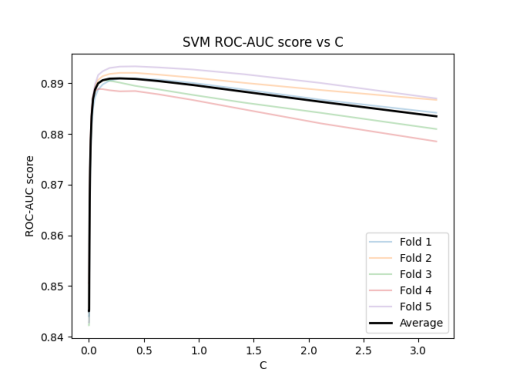

In [ ]:
%matplotlib inline
img=plt.imread(os.path.join(DIR_PATH_Plot,'SVM/SVM ROC-AUC score vs C.png'))
plt.axis('off')
plt.imshow(img)
plt.show()

In [ ]:
params = {
    'probability':True,
    'class_weight':"balanced",
    'kernel':"rbf",
    'C': np.logspace(-3, 0.5, 21)
}
param_name = 'C'
# classifier = SVC
# plot_param_each_fold("SVM",params, param_name, classifier, X_train, y_train)

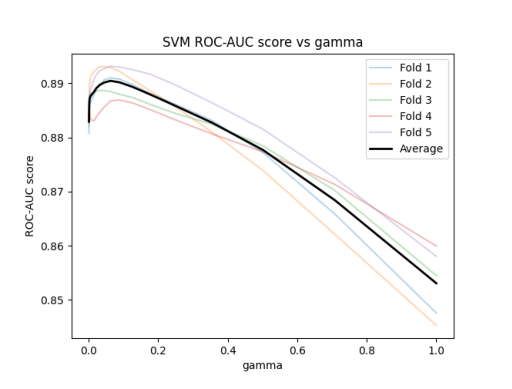

In [ ]:
%matplotlib inline
img=plt.imread(os.path.join(DIR_PATH_Plot,'SVM/SVM ROC-AUC score vs gamma.png'))
plt.axis('off')
plt.imshow(img)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
import joblib
# param_grid = {'C': np.logspace(-3, 0.5, 21)[13:18], 'gamma': np.logspace(-3, 0, 21)[10:15]}
# # Create the SVM model
# clf = SVC(kernel="rbf", random_state=42)
# # Perform Grid Search with cross-validation
# grid_search = GridSearchCV(clf, param_grid, cv=5, scoring="accuracy")
# grid_search.fit(X_train, y_train)
# # Get the best parameters
# best_C = grid_search.best_params_['C']
# best_gamma = grid_search.best_params_['gamma']
# print("Best C:", best_C)
# print("Best gamma:", best_gamma)
# joblib.dump(grid_search, 'grid_search_SVM.joblib')
# Best C: 0.630957344480193
# Best gamma: 0.12589254117941676

In [ ]:
# clf = SVC(probability=True, class_weight = "balanced", kernel = "rbf", C = 0.630957344480193, gamma = 0.12589254117941676)
# SVM_model_performance(clf)
# Accuracy: 0.8603021677249836
# ROC-AUC: 0.8933249404156645

In [ ]:
# from cuml.svm import SVC, LinearSVC
from sklearn.svm import SVC

# Initialize the logistic regression model
clf = SVC(probability=True, class_weight = "balanced", kernel = "rbf", C = 0.630957344480193, gamma = 0.12589254117941676)
# Train the model on the training data
clf.fit(X_train, y_train)
# Predict the target variable for the testing data
y_preds = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

eval_model()

ROC-AUC= 0.892876511128686 
 PR-AUC= 0.736975937125218 
 accuracy= 0.8289905846288592 
 report               precision    recall  f1-score   support

         0.0       0.93      0.84      0.88      3507
         1.0       0.60      0.79      0.68      1060

    accuracy                           0.83      4567
   macro avg       0.77      0.82      0.78      4567
weighted avg       0.85      0.83      0.84      4567
 
confusion matrix: 
 [[2945  562]
 [ 219  841]]


## Logistic Regression

In [ ]:
# Initialize the logistic regression model
lr = LogisticRegression(random_state=42,max_iter=1000)
# Train the model on the training data
lr.fit(X_train, y_train)
# Predict the target variable for the testing data
y_preds = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

eval_model()

ROC-AUC= 0.8923285504462773 
 PR-AUC= 0.7453803337870246 
 accuracy= 0.8620538646814101 
 report               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      3507
         1.0       0.76      0.59      0.67      1060

    accuracy                           0.86      4567
   macro avg       0.82      0.77      0.79      4567
weighted avg       0.86      0.86      0.86      4567
 
confusion matrix: 
 [[3307  200]
 [ 430  630]]


Random Search

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid to search over
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.linspace(np.exp(-4), np.exp(1.3), num=50),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000,10000]
    }
]

# create RandomizedSearchCV object
random_search_lr = RandomizedSearchCV(
    lr, param_distributions=param_grid, 
    n_iter=50, cv=5, random_state=42,
    n_jobs= -1)

# fit the RandomizedSearchCV object to the data
random_search_lr.fit(X_train, y_train)

# print the best hyperparameters and the associated model performance
print(random_search_lr.best_params_)
print(random_search_lr.best_score_)

# Save the grid search object to a file
joblib.dump(random_search_lr, 'grid_search_lr_random.joblib')

In [ ]:
random_search_lr = joblib.load('grid_search_lr_random.joblib')
random_search_lr.best_params_

{'solver': 'liblinear',
 'penalty': 'l1',
 'max_iter': 10000,
 'C': 0.7634138080174098}

In [ ]:
y_preds = random_search_lr.predict(X_test)
y_pred_proba = random_search_lr.predict_proba(X_test)[:, 1]

eval_model()

ROC-AUC= 0.893900608486531 
 PR-AUC= 0.7491557626400893 
 accuracy= 0.8629297131596234 
 report               precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      3507
         1.0       0.76      0.60      0.67      1060

    accuracy                           0.86      4567
   macro avg       0.82      0.77      0.79      4567
weighted avg       0.86      0.86      0.86      4567
 
confusion matrix: 
 [[3303  204]
 [ 422  638]]


Grid Search

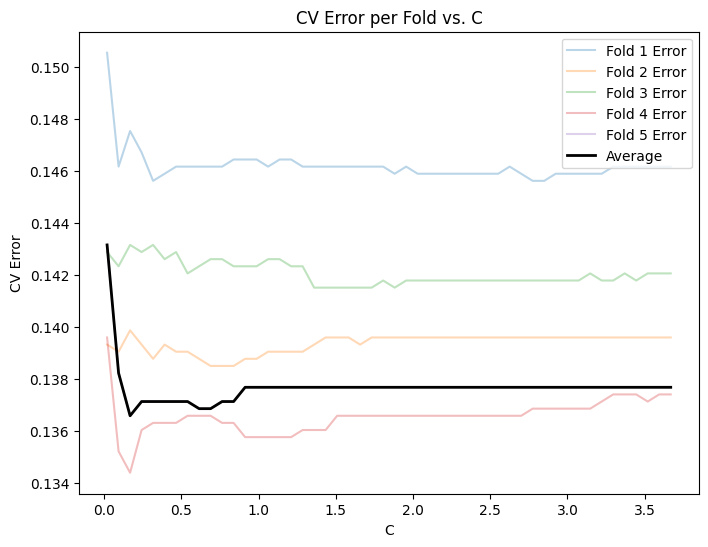

In [ ]:
grid_cv = LogisticRegression(max_iter=1000)
param_range =np.linspace(np.exp(-4), np.exp(1.3), num=50)
param_name = 'C'
train = X_train
label = y_train
plot_cv_error_per_fold(grid_cv, param_range, param_name, train, label, cv=5)

100%|██████████| 50/50 [00:49<00:00,  1.01it/s]


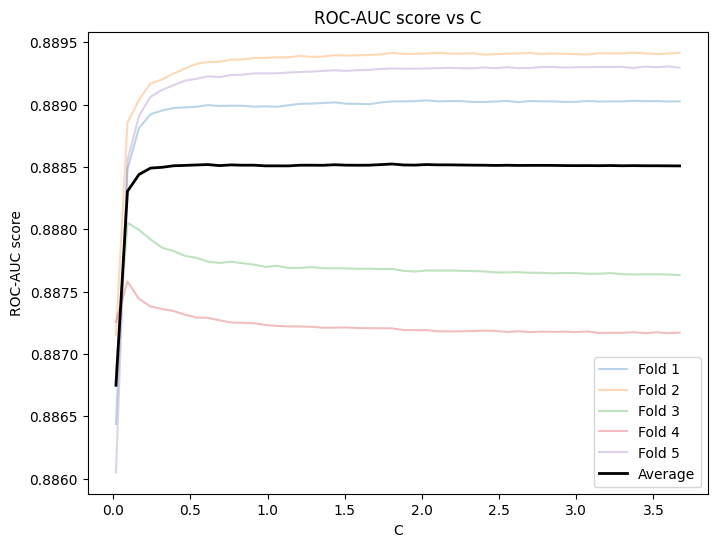

In [ ]:
params = {
    'C': np.linspace(np.exp(-4), np.exp(1.3), num=50),
    'max_iter':1000
}
param_name = 'C'
classifier = LogisticRegression
plot_param_each_fold(params, param_name, classifier, X_train, y_train)

In [ ]:
# Define the parameter grid to search over
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.linspace(np.exp(-4), np.exp(1.3), num=50),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000,10000]
    }
]


# Perform grid search to find the best hyperparameters
grid_search_lr = GridSearchCV(lr, param_grid, cv=5,verbose=False, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
joblib.dump(grid_search_lr, 'grid_search_lr.joblib')

In [ ]:
grid_search_lr = joblib.load(os.path.join(DIR_PATH, f'./grid_search_lr.joblib'))
grid_search_lr.best_params_

{'C': 0.39086472345307194, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

ROC-AUC= 0.8925714608518811 
 PR-AUC= 0.7462834107751811 
 accuracy= 0.8609590540836435 
 report               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      3507
         1.0       0.76      0.59      0.66      1060

    accuracy                           0.86      4567
   macro avg       0.82      0.77      0.79      4567
weighted avg       0.85      0.86      0.85      4567
 
confusion matrix: 
 [[3303  204]
 [ 431  629]]


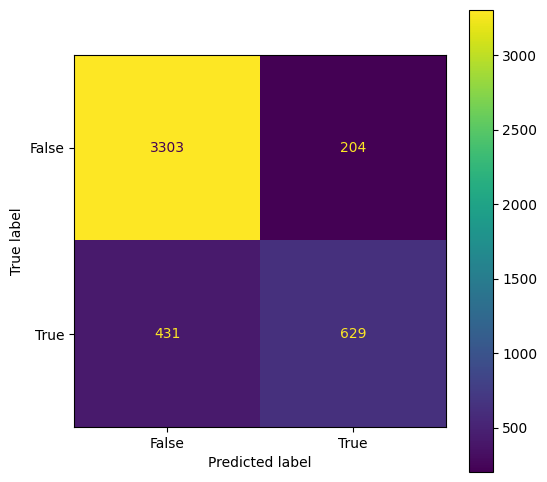

In [ ]:
y_preds = grid_search_lr.predict(X_test)
y_pred_proba = grid_search_lr.predict_proba(X_test)[:, 1]

eval_model()
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.gcf().set_size_inches(6, 6)
plt.savefig('lr_tuned_cm.png')
plt.show()

## Decision Tree

Baseline Model

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the logistic regression model
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Predict the target variable for the testing data
y_preds = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# eval_base()
eval_model()

ROC-AUC= 0.7067959767795945 
 PR-AUC= 0.6013113856016363 
 accuracy= 0.7897963652288155 
 report               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      3507
         1.0       0.55      0.55      0.55      1060

    accuracy                           0.79      4567
   macro avg       0.71      0.71      0.71      4567
weighted avg       0.79      0.79      0.79      4567
 
confusion matrix: 
 [[3022  485]
 [ 475  585]]


Prune the decision tree (class example)

In [15]:
# Define your decision tree model
# decisionTree = DecisionTreeClassifier(max_depth=5)
decisionTree = DecisionTreeClassifier(
    criterion="gini",    # loss function
    min_samples_leaf=1,  # can have down to one observation per terminal node
    max_features=None,   # = n_features
    # remove all randomization e.g., due to two splits having the same decrease in loss
    random_state=0
)

# Fit the model to the training data
decisionTree.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_preds = decisionTree.predict(X_test)
y_pred_proba = decisionTree.predict_proba(X_test)[:, 1]
eval_model()

ROC-AUC= 0.7075634445394925 
 PR-AUC= 0.6032641321801329 
 accuracy= 0.7919859864243486 
 report               precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      3507
         1.0       0.55      0.55      0.55      1060

    accuracy                           0.79      4567
   macro avg       0.71      0.71      0.71      4567
weighted avg       0.79      0.79      0.79      4567
 
confusion matrix: 
 [[3034  473]
 [ 477  583]]


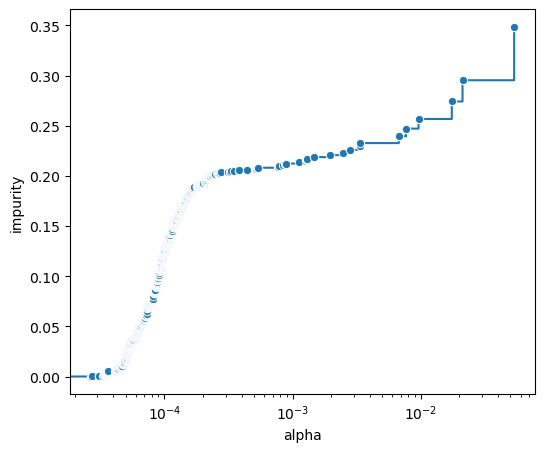

In [ ]:
import matplotlib as mpl

# Check if node impurity is a monotonic function of alpha

ccp_path = decisionTree.cost_complexity_pruning_path(X_train, y_train)

sns.lineplot(
    data={"alpha": ccp_path.ccp_alphas,
          "impurity": ccp_path.impurities},
    x="alpha",
    y="impurity",
    marker="o",
    drawstyle="steps-post"
)
plt.xscale("log")

plt.gcf().set_size_inches(6, 5)

# plt.figure(figsize=(8, 6))
# save picture
plt.savefig('Decision_Tree/ccp_path.png')

In [ ]:
X_array = X.values
y_array = y.values

We comment the following chunk since we already save the data in .joblib

In [ ]:
import joblib
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import tree
# crossvalidation folds
n_folds = 5
cv = KFold(
    n_splits=n_folds,  # number of folds
    shuffle=True  # protects against data being ordered, e.g., all successes first
)

cv_loss = []
for (train_id, test_id) in cv.split(df.values):
    # foldwise training and test data
    X_train = X_array[train_id, :]
    y_train = y_array[train_id]
    X_test = X_array[test_id, :]
    y_test = y_array[test_id]

    # cost complexity pruning
    # first grow tree
    clf = tree.DecisionTreeClassifier(
        criterion="gini",  # loss function
        min_samples_leaf=1,  # can have down to one observation per terminal node
        max_features=None,  # = n_features
        # remove all randomization e.g., due to two splits having the same decrease in loss
        random_state=0
        # n_jobs=-1
    )
    # next calculate all alphas
    path = clf.cost_complexity_pruning_path(X_train, y_train)

    # calculate the missclassification error for each alpha
    loss = []
    for alpha in path.ccp_alphas:
        # fit the given tree
        clf_alpha = tree.DecisionTreeClassifier(
            # n_jobs=-1,
            criterion="gini",
            min_samples_leaf=1,
            max_features=None,
            random_state=0,
            ccp_alpha=alpha  # cost complexity pruning parameter
        )
        # calculate the test error
        clf_alpha.fit(X_train, y_train)
        loss.append(1.0 - clf_alpha.score(X_test, y_test))
        
    cv_loss.append({
        "alpha": path.ccp_alphas,
        "loss": np.array(loss)
    })

# 9min
# Save the best model using joblib
joblib.dump(cv_loss, 'Decision_Tree/cv_loss_dt_alpha.joblib')

['Decision_Tree/cv_loss_dt_alpha.joblib']

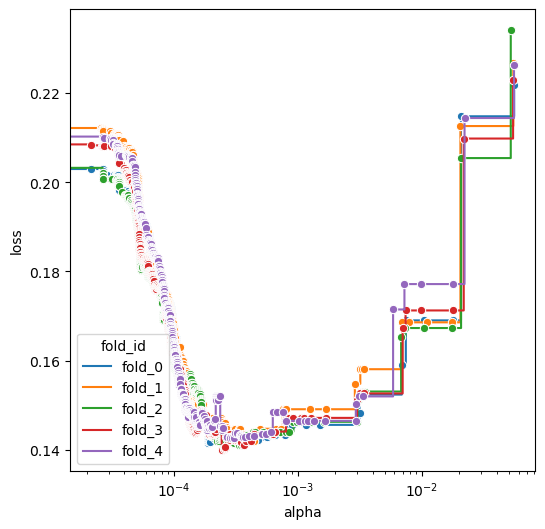

In [14]:
import joblib
# Plot CV loss vs alpha for each fold
n_folds = 5

# Load the saved model
cv_loss = joblib.load(os.path.join(DIR_PATH, f"Decision_Tree/cv_loss_dt_alpha.joblib"))

plt_data = pd.concat([pd.DataFrame(cv_loss[i]).assign(fold_id='fold_' + str(i)) for i in np.arange(n_folds)])
plt_data.reset_index(inplace=True)
# print(plt_data)
sns.lineplot(
    data=plt_data,
    x="alpha",
    y="loss",
    hue="fold_id",    
    marker="o",
    drawstyle="steps-post"
)
plt.xscale("log")

plt.gcf().set_size_inches(6, 6)

# 6s
# save picture
plt.savefig('Decision_Tree/cv_loss_dt_alpha.png')

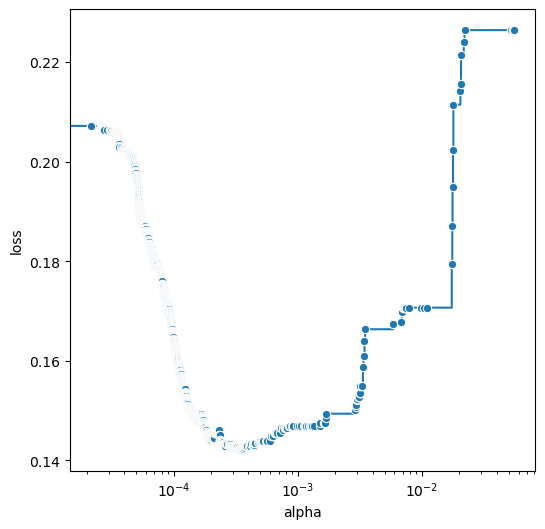

In [15]:
def step_fun(x, x_step, y_step):
    """
    Step function.

    Args:
        x: Vector of values at which to evaluate the step function.
        x_step: Vector of step x-values sorted in increasing order.
        y_step: Vector of step y-values.

    Returns:
        Vector of the same length as `x`, where each element is the value of `y_step` corresponding to the
            larges value of `x_step` which is less than or equal to `x`.
    """
    y = np.empty_like(x)
    ids = x < x_step[-1]
    y[ids] = y_step[np.searchsorted(x_step, x[ids], side="right")]
    y[~ids] = y_step[-1]
    return y


# full sequence of alphas
alpha_seq = np.sort(np.concatenate(
    [cv_loss[i]["alpha"] for i in np.arange(n_folds)]))

# corresponding cv error
loss_seq = [step_fun(alpha_seq,
          x_step=cv_loss[i]["alpha"],
          y_step=cv_loss[i]["loss"])
 for i in np.arange(n_folds)]
loss_seq = np.stack(loss_seq, axis=-1)
loss_seq = np.mean(loss_seq, axis=1)

sns.lineplot(
    data={"alpha": alpha_seq, "loss": loss_seq},
    x="alpha",
    y="loss",
    marker="o",
    drawstyle="steps-post"
)
plt.xscale("log")

plt.gcf().set_size_inches(6, 6)
# save picture
plt.savefig('Decision_Tree/cv_loss_alpha_seq.png')

In [17]:
alpha_cv = alpha_seq[np.argmin(loss_seq)]  # selected value of alpha

# Check the performance for pruned decision tree
clf_pruned = DecisionTreeClassifier(
    criterion="gini",
    min_samples_leaf=1,
    max_features=None,
    random_state=42,
    ccp_alpha=alpha_cv
)

clf_pruned.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_preds = clf_pruned.predict(X_test)
y_pred_proba = clf_pruned.predict_proba(X_test)[:, 1]
eval_model()

ROC-AUC= 0.8794182524438994 
 PR-AUC= 0.7250469726897298 
 accuracy= 0.8557039632143639 
 report               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      3507
         1.0       0.74      0.59      0.66      1060

    accuracy                           0.86      4567
   macro avg       0.81      0.76      0.78      4567
weighted avg       0.85      0.86      0.85      4567
 
confusion matrix: 
 [[3281  226]
 [ 433  627]]


### Random Search

Grid search can be computationally expensive, by using random search first, we can potentially reduce the size of the search space by focusing on the most promising regions identified in the random search phase.

gini

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# define hyperparameter space
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 100),
    'min_samples_leaf': randint(1, 100),
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced', {0: 1, 1: 10}]
}

# create decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# create RandomizedSearchCV object
random_search_dt = RandomizedSearchCV(
    dtc, param_distributions=param_dist, 
    n_iter=50, cv=5, random_state=42,
    n_jobs= -1)

# fit the RandomizedSearchCV object to the data
random_search_dt.fit(X_train, y_train)

# print the best hyperparameters and the associated model performance
print(random_search_dt.best_params_)
print(random_search_dt.best_score_)

# Save the grid search object to a file
joblib.dump(random_search_dt, 'Decision_Tree/grid_search_dt_random.joblib')


{'class_weight': None, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 62, 'min_samples_split': 63}
0.8529975362715577


['Decision_Tree/grid_search_dt_random.joblib']

In [19]:
# Load the grid search object from a file
random_search_dt = joblib.load(os.path.join(DIR_PATH, f'./Decision_Tree/grid_search_dt_random.joblib'))
random_search_dt.best_params_

{'class_weight': None,
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 62,
 'min_samples_split': 63}

In [20]:
# Fit the decision tree with random parameters
dt_random = DecisionTreeClassifier(
    criterion="gini",
    max_depth=10,
    min_samples_leaf=62,
    min_samples_split=63,
    max_features = None,
    random_state=42,
    # ccp_alpha=alpha_cv,
    class_weight=None
)

dt_random.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_preds = dt_random.predict(X_test)
y_pred_proba = dt_random.predict_proba(X_test)[:, 1]

eval_model()

ROC-AUC= 0.8776905757218716 
 PR-AUC= 0.7314741980504449 
 accuracy= 0.8557039632143639 
 report               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      3507
         1.0       0.73      0.60      0.66      1060

    accuracy                           0.86      4567
   macro avg       0.81      0.77      0.78      4567
weighted avg       0.85      0.86      0.85      4567
 
confusion matrix: 
 [[3273  234]
 [ 425  635]]


entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# define hyperparameter space
param_dist = {
    'criterion': ['entropy'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 100),
    'min_samples_leaf': randint(1, 100),
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced', {0: 1, 1: 10}]
}

# create decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# create RandomizedSearchCV object
random_search_dt = RandomizedSearchCV(
    dtc, param_distributions=param_dist, 
    n_iter=50, cv=5, random_state=42,
    n_jobs= -1)

# fit the RandomizedSearchCV object to the data
random_search_dt.fit(X_train, y_train)

# print the best hyperparameters and the associated model performance
print(random_search_dt.best_params_)
print(random_search_dt.best_score_)

# Save the grid search object to a file
joblib.dump(random_search_dt, 'Decision_Tree/grid_search_dt_random_en.joblib')


{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 62, 'min_samples_split': 63}
0.8531617848343828


['Decision_Tree/grid_search_dt_random_en.joblib']

In [ ]:
# Load the grid search object from a file
random_search_dt_en = joblib.load(os.path.join(DIR_PATH, f'./Decision_Tree/grid_search_dt_random_en.joblib'))
random_search_dt_en.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 62,
 'min_samples_split': 63}

In [ ]:
# Fit the decision tree with random parameters
dt_random_en = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=10,
    min_samples_leaf=62,
    min_samples_split=63,
    max_features = None,
    random_state=42,
    # ccp_alpha=alpha_cv,
    class_weight=None
)

dt_random_en.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_preds = dt_random_en.predict(X_test)
y_pred_proba = dt_random_en.predict_proba(X_test)[:, 1]

eval_model()

ROC-AUC= 0.879525046941158 
 PR-AUC= 0.7363137596972585 
 accuracy= 0.8546091526165973 
 report               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      3507
         1.0       0.74      0.58      0.65      1060

    accuracy                           0.85      4567
   macro avg       0.81      0.76      0.78      4567
weighted avg       0.85      0.85      0.85      4567
 
confusion matrix: 
 [[3286  221]
 [ 443  617]]


### Grid Search for Decision Tree

#### Grid Search for each parameter

**max_depth**

This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. We fit a decision tree with depths ranging from 1 to 32 and plot the training and test auc scores.

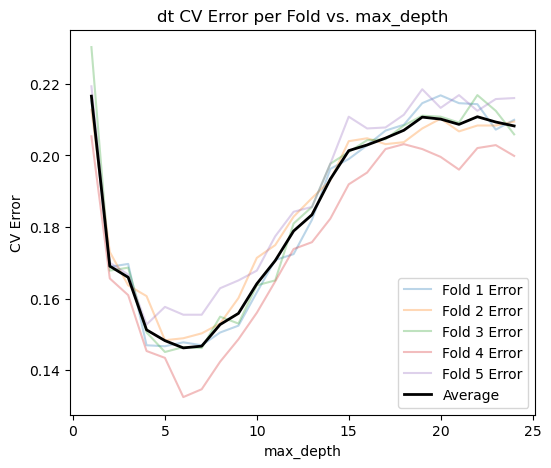

In [ ]:
# Example usage
from sklearn.tree import DecisionTreeClassifier

# Plot CV error per fold vs. max_depth
grid_cv = DecisionTreeClassifier()
param_range = np.arange(1, 25)
param_name = 'max_depth'
method = 'dt'
# train = X_train
# label = y_train
plot_cv_error_per_fold(grid_cv, param_range, param_name, X_train, y_train, method, cv=5)

100%|██████████| 24/24 [00:07<00:00,  3.41it/s]


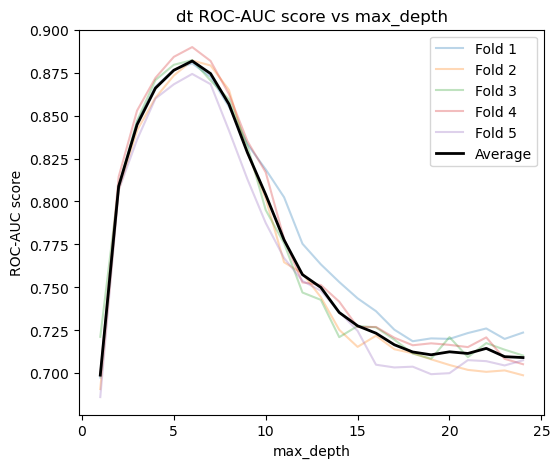

In [ ]:
# Plot ROC-AUC per fold vs. max_depth
params = {
    'max_depth': list(range(1, 25))
}
param_name = 'max_depth'
method = 'dt'
classifier = DecisionTreeClassifier
plot_param_each_fold(params, param_name, classifier, X_train, y_train, method)

We see that our model overfits for large depth values. The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data. We will use (1,10).

**min_samples_split**

The minimum number of samples required to split an internal node.

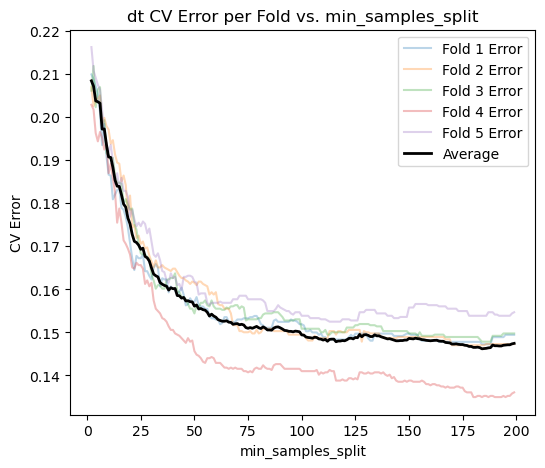

In [ ]:
# Plot CV error per fold vs. min_samples_split
param_range = np.arange(2, 200)
param_name = 'min_samples_split'
method = 'dt'
# train = X_train
# label = y_train
plot_cv_error_per_fold(grid_cv, param_range, param_name, X_train, y_train, method, cv=5)
# 1 min

100%|██████████| 198/198 [01:00<00:00,  3.25it/s]


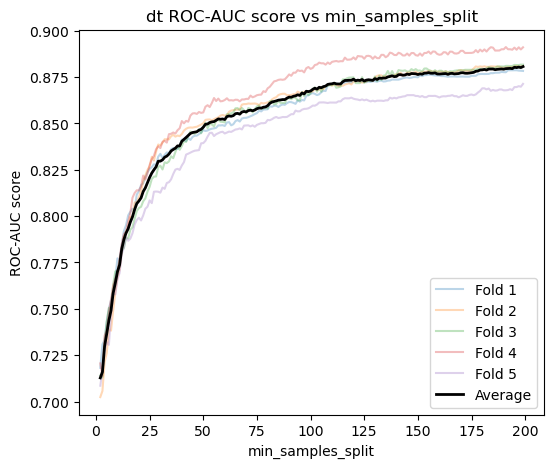

In [ ]:
# Plot ROC-AUC per fold vs. min_samples_split
params = {
    'min_samples_split': list(range(2, 200))
}
param_name = 'min_samples_split'
classifier = DecisionTreeClassifier
method = 'dt'
plot_param_each_fold(params, param_name, classifier, X_train, y_train, method)

**min_samples_leaf**

The minimum number of samples required to be at a leaf node

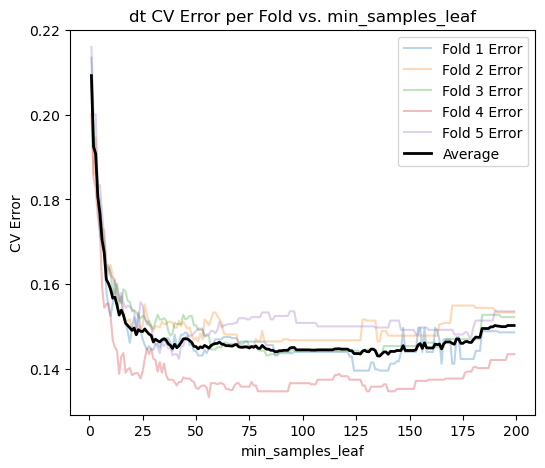

In [ ]:
# Plot CV error per fold vs. min_samples_leaf
param_range = np.arange(1, 200)
param_name = 'min_samples_leaf'
method = 'dt'
plot_cv_error_per_fold(grid_cv, param_range, param_name, X_train, y_train, method, cv=5)
# 1 min

100%|██████████| 199/199 [00:48<00:00,  4.13it/s]


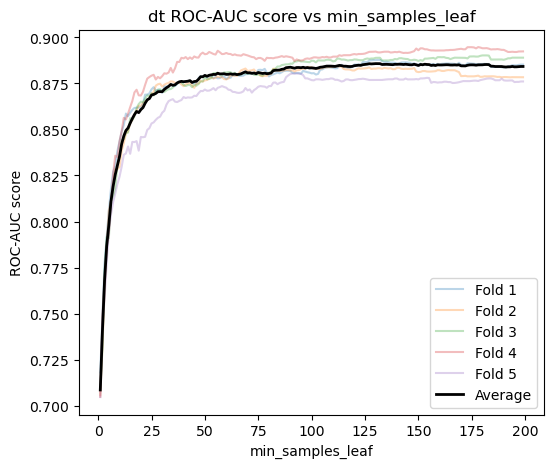

In [ ]:
# Plot ROC-AUC per fold vs. min_samples_leaf
params = {
    'min_samples_leaf': list(range(1, 200))
}
param_name = 'min_samples_leaf'
classifier = DecisionTreeClassifier
method = 'dt'
plot_param_each_fold(params, param_name, classifier, X_train, y_train, method)
# 1 min

**max_features**

This parameter specifies the maximum number of features to consider when splitting a node. The range for this parameter is usually between 1 and the total number of features in the dataset.

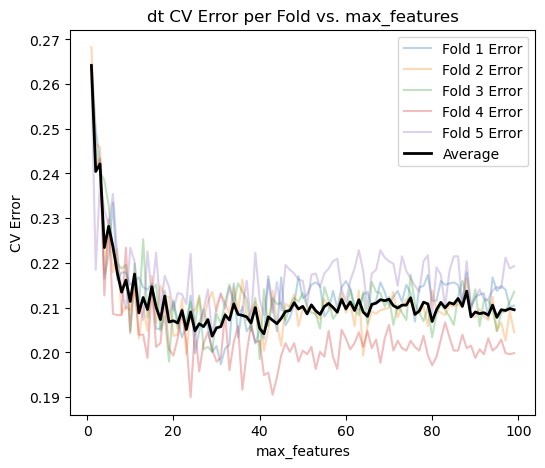

In [ ]:
# Plot CV error per fold vs. max_features
param_range = np.arange(1, 100)
param_name = 'max_features'
method = 'dt'
plot_cv_error_per_fold(grid_cv, param_range, param_name, X_train, y_train, method, cv=5)

100%|██████████| 99/99 [00:30<00:00,  3.21it/s]


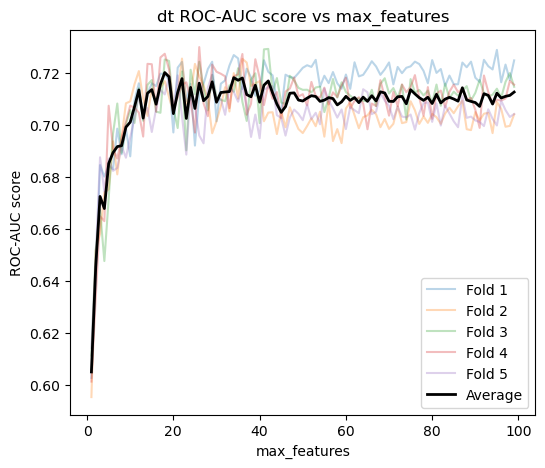

In [ ]:
# Plot ROC-AUC per fold vs. max_features
params = {
    'max_features': list(range(1, 100))
}
param_name = 'max_features'
classifier = DecisionTreeClassifier
method = 'dt'
plot_param_each_fold(params, param_name, classifier, X_train, y_train, method)

**Grid Search for combination parameters**

We figure out the approximate optimal range for the above parameters.

After narrowed down the search space using random search, we can use grid search to perform a more systematic exploration of the smaller space.

criterion with Gini

NOTE: We comment the following chunk since we already save as .joblib

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import joblib
from joblib import dump

n_features = X_train.shape[1]

# define hyperparameters to search over
param_grid = {
    'criterion': ['gini'],
    'max_depth': np.arange(4, 9),
    'min_samples_split': np.arange(50, 75),
    'min_samples_leaf': np.arange(25, 55),
    # 'max_features': [None, 0.1, 'sqrt', 'log2'],
    'max_features': np.arange(20, 40),
    'ccp_alpha': [alpha_cv]
    # 'class_weight': [None, 'balanced']
}

# create a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# create the grid search object
grid_search_dt = GridSearchCV(
    dtc, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    scoring='accuracy', 
    verbose=1
)

# fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

# print the best parameters and score
print(f'Best parameters: {grid_search_dt.best_params_}')
print(f'Best cross-validation score: {grid_search_dt.best_score_:.3f}')

# Save the grid search object to a file
joblib.dump(grid_search_dt, 'Decision_Tree/grid_search_dt_gini.joblib')

# 2min with 54000 fits
# 27min with 375000 fits


Fitting 5 folds for each of 75000 candidates, totalling 375000 fits
Best parameters: {'ccp_alpha': 0.0003497089897578458, 'criterion': 'gini', 'max_depth': 7, 'max_features': 37, 'min_samples_leaf': 35, 'min_samples_split': 74}
Best cross-validation score: 0.857


['Decision_Tree/grid_search_dt_gini.joblib']

In [ ]:
# Load the grid search object from a file
grid_search_dt = joblib.load(os.path.join(DIR_PATH, f'./Decision_Tree/grid_search_dt_gini.joblib'))
grid_search_dt.best_params_

{'ccp_alpha': 0.0003497089897578458,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 37,
 'min_samples_leaf': 35,
 'min_samples_split': 74}

ROC-AUC= 0.8803363623157997 
 PR-AUC= 0.7296408273369626 
 accuracy= 0.8559229253339172 
 report               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      3507
         1.0       0.75      0.57      0.65      1060

    accuracy                           0.86      4567
   macro avg       0.81      0.76      0.78      4567
weighted avg       0.85      0.86      0.85      4567
 
confusion matrix: 
 [[3303  204]
 [ 454  606]]


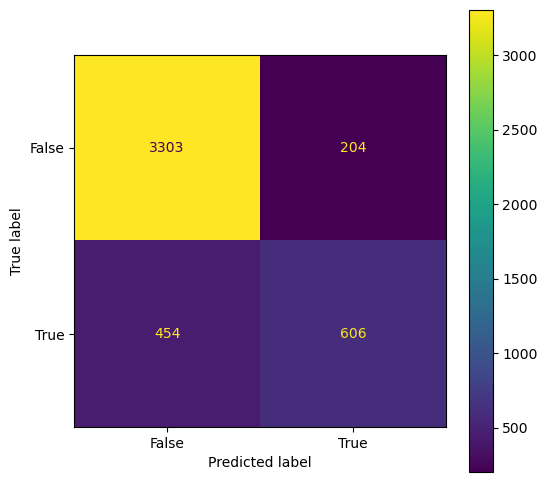

In [21]:
dt_tune = DecisionTreeClassifier(
    criterion="gini",
    max_depth=7,
    min_samples_leaf=35,
    min_samples_split=74,
    max_features=37,
    random_state=42,
    ccp_alpha=alpha_cv
    # class_weight='balanced'
)

dt_tune.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_preds = dt_tune.predict(X_test)
y_pred_proba = dt_tune.predict_proba(X_test)[:, 1]

eval_model()

cm = confusion_matrix(y_test, y_preds)

# Plot the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.gcf().set_size_inches(6, 6)
plt.savefig('Decision_Tree/dt_tune_gini_cm.png')
plt.show()

criterion with Entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import joblib
from joblib import dump

n_features = X_train.shape[1]

# define hyperparameters to search over
param_grid = {
    'criterion': ['entropy'],
    'max_depth': np.arange(4, 9),
    'min_samples_split': np.arange(50, 75),
    'min_samples_leaf': np.arange(25, 40),
    # 'max_features': [None, 0.1, 'sqrt', 'log2'],
    'max_features': np.arange(25, 40),
    'ccp_alpha': [alpha_cv],
    'class_weight': [None, 'balanced']
}


# create a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# create the grid search object
grid_search_dt = GridSearchCV(
    dtc, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    scoring='accuracy', 
    verbose=1
)

# fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

# print the best parameters and score
print(f'Best parameters: {grid_search_dt.best_params_}')
print(f'Best cross-validation score: {grid_search_dt.best_score_:.3f}')

# Save the grid search object to a file
joblib.dump(grid_search_dt, 'Decision_Tree/grid_search_dt_entropy.joblib')

# 24min with 281250 fits


Fitting 5 folds for each of 56250 candidates, totalling 281250 fits
Best parameters: {'ccp_alpha': 0.0003497089897578458, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 34, 'min_samples_leaf': 26, 'min_samples_split': 69}
Best cross-validation score: 0.858


['Decision_Tree/grid_search_dt_entropy.joblib']

In [ ]:
# Load the grid search object from a file
grid_search_dt_en = joblib.load(os.path.join(DIR_PATH, f'./Decision_Tree/grid_search_dt_entropy.joblib'))
grid_search_dt_en.best_params_

{'ccp_alpha': 0.0003497089897578458,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 34,
 'min_samples_leaf': 26,
 'min_samples_split': 69}

ROC-AUC= 0.8757366925426397 
 PR-AUC= 0.7076203600637722 
 accuracy= 0.8554533508541393 
 report               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      3533
         1.0       0.73      0.57      0.64      1033

    accuracy                           0.86      4566
   macro avg       0.81      0.76      0.78      4566
weighted avg       0.85      0.86      0.85      4566
 
confusion matrix: 
 [[3315  218]
 [ 442  591]]


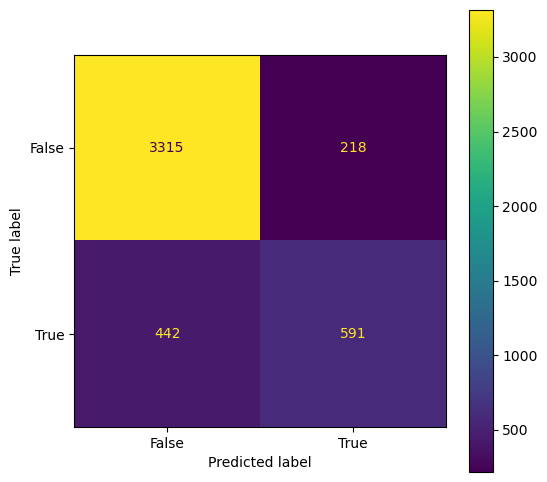

In [ ]:
dt_tune_e = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=7,
    min_samples_leaf=26,
    min_samples_split=69,
    max_features=34,
    random_state=42,
    ccp_alpha=alpha_cv
    # class_weight='balanced'
)

dt_tune_e.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_preds = dt_tune_e.predict(X_test)
y_pred_proba = dt_tune_e.predict_proba(X_test)[:, 1]

eval_model()

cm = confusion_matrix(y_test, y_preds)

# Plot the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.gcf().set_size_inches(6, 6)
plt.savefig('Decision_Tree/dt_tune_entropy_cm.png')
plt.show()


Thus, final model should be used with criterion=gini.

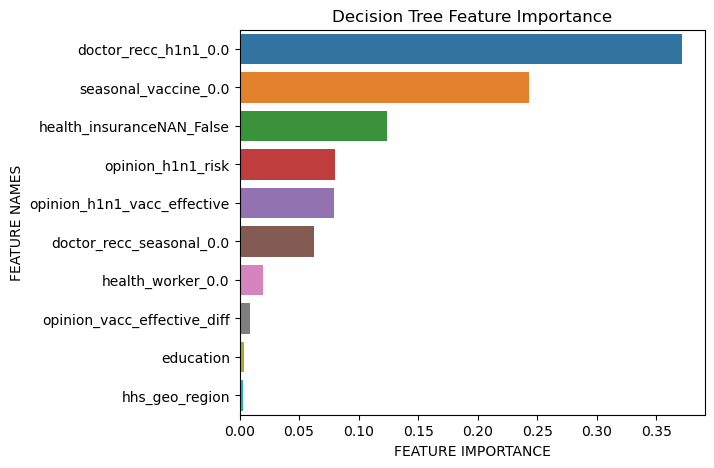

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt_tune_f = DecisionTreeClassifier(
    criterion="gini",
    max_depth=7,
    min_samples_leaf=35,
    min_samples_split=74,
    max_features=37,
    random_state=42,
    ccp_alpha=alpha_cv
)

dt_tune_f.fit(X_train, y_train)
importances = dt_tune_f.feature_importances_
feature_names = X_train.columns
plot_feature_importance(importances, feature_names, 'Decision Tree')

## Bagging

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# create DecisionTreeClassifier object
dt = DecisionTreeClassifier()

# create BaggingClassifier object and fit it to data
bagged_tree = BaggingClassifier(dt, n_estimators=100, random_state=42)
bagged_tree.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_preds = bagged_tree.predict(X_test)
y_pred_proba = bagged_tree.predict_proba(X_test)[:, 1]

eval_model()

ROC-AUC= 0.8538994201064599 
 PR-AUC= 0.6780266776294785 
 accuracy= 0.8519402985074627 
 report               precision    recall  f1-score   support

           0       0.88      0.94      0.91      3936
           1       0.72      0.52      0.60      1089

    accuracy                           0.85      5025
   macro avg       0.80      0.73      0.76      5025
weighted avg       0.84      0.85      0.84      5025
 
confusion matrix: 
 [[3716  220]
 [ 524  565]]


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

dt_tune_f = DecisionTreeClassifier(
    criterion="gini",
    max_depth=7,
    min_samples_leaf=35,
    min_samples_split=74,
    max_features=37,
    random_state=42,
    ccp_alpha=alpha_cv
)

# create BaggingClassifier object and fit it to data
bagged_tree = BaggingClassifier(dt_tune_f, n_estimators=100, random_state=42)
bagged_tree.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_preds = bagged_tree.predict(X_test)
y_pred_proba = bagged_tree.predict_proba(X_test)[:, 1]

eval_model()

ROC-AUC= 0.8880717002652376 
 PR-AUC= 0.7529449244365469 
 accuracy= 0.8576746222903437 
 report               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      3507
         1.0       0.74      0.60      0.66      1060

    accuracy                           0.86      4567
   macro avg       0.81      0.77      0.79      4567
weighted avg       0.85      0.86      0.85      4567
 
confusion matrix: 
 [[3285  222]
 [ 428  632]]


## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)
prediction_proba = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, prediction_proba)
print('ROC-AUC:', roc_auc)

Accuracy: 0.8570177359316838
ROC-AUC: 0.8870454508772213


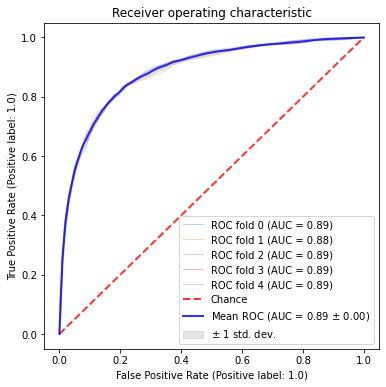

In [ ]:
rocCurveKCV(rf, X_train, y_train, n_splits=5)

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier

Fitting 5 folds for each of 10 candidates, totalling 50 fits


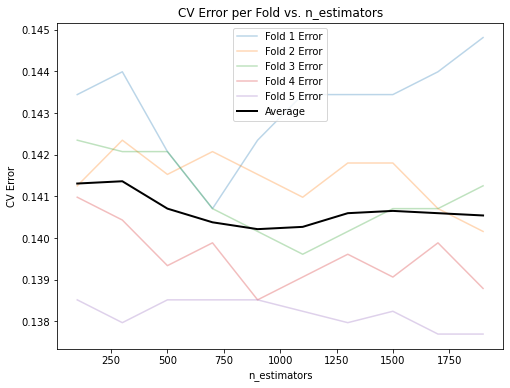

In [ ]:
grid_cv = RandomForestClassifier(random_state=42)
param_range = np.arange(100,2000,200)
param_name = 'n_estimators'
train = X_train
label = y_train
plot_cv_error_per_foldM(grid_cv, param_range, param_name, train, label, cv=5)

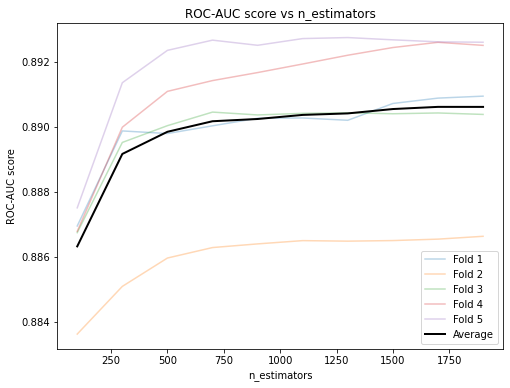

In [ ]:
classifier = RandomForestClassifier
params = {
    'n_estimators': np.arange(100,2100,200),
    'random_state': 42}
param_name = 'n_estimators'
plot_param_each_foldM(params, param_name, classifier, train, label)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


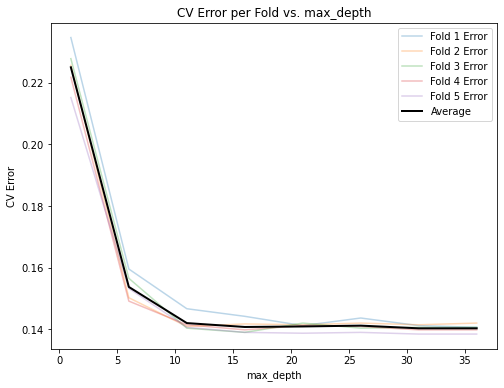

In [ ]:
grid_cv = RandomForestClassifier(n_estimators=700, random_state=42)
param_range = np.arange(1,40,5)
param_name = 'max_depth'
plot_cv_error_per_foldM(grid_cv, param_range, param_name, train, label, cv=5)

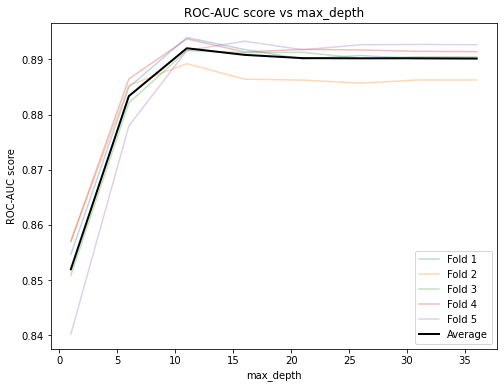

In [ ]:
params = {
    'max_depth': np.arange(1,40,5),
    'n_estimators': 700,
    'random_state': 42}
param_name = 'max_depth'
plot_param_each_foldM(params, param_name, classifier, train, label)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


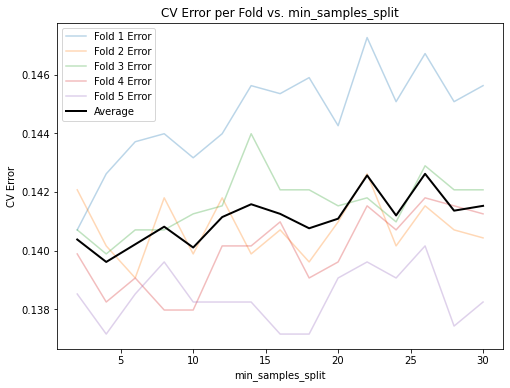

In [ ]:
param_range = np.arange(2,32,2)
param_name = 'min_samples_split'

plot_cv_error_per_foldM(grid_cv, param_range, param_name, train, label, cv=5)

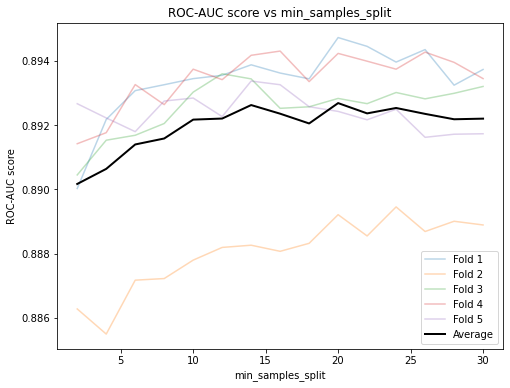

In [ ]:
params = {
    'min_samples_split': np.arange(2,32,2),
    'n_estimators':700,
    'random_state': 42}
param_name = 'min_samples_split'
plot_param_each_foldM(params, param_name, classifier, train, label)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


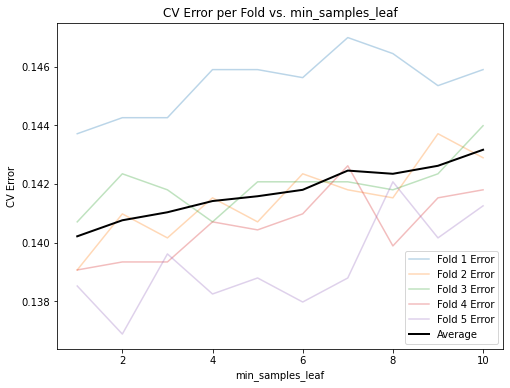

In [ ]:
grid_cv = RandomForestClassifier(n_estimators=700, min_samples_split=6, random_state=42)
param_range = np.arange(1,11)
param_name = 'min_samples_leaf'

plot_cv_error_per_foldM(grid_cv, param_range, param_name, train, label, cv=5)

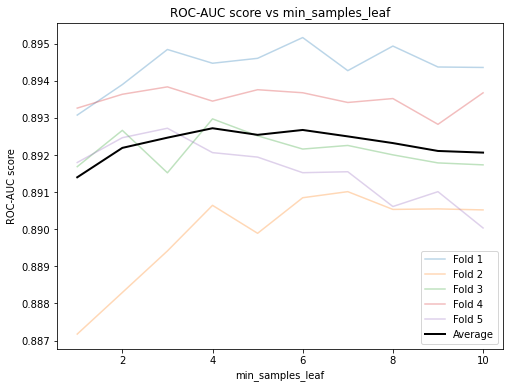

In [ ]:
params = {
    'min_samples_leaf': np.arange(1,11),
    'n_estimators': 700,
    'min_samples_split': 6,
    'random_state': 42}
param_name = 'min_samples_leaf'
plot_param_each_foldM(params, param_name, classifier, train, label)

In [ ]:
# Define the set of hyperparameters to search through
grid = {
    # Max levels
    'max_depth': [int(x) for x in np.arange(5,21)],
    # Min number of samples for node split
    'min_samples_split': [2,4,6,8,10],
    # Min number of samples at aech leaf node
    'min_samples_leaf': [1,2,3,4,5],
    # Class weight option
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

In [ ]:
#Saved the result
import time

start_time = time.time()

rf_tuning = RandomForestClassifier(n_estimators=700, random_state=42)
rf_Grid = GridSearchCV(estimator = rf_tuning,
                       param_grid = grid,
                       cv = 5, verbose=10, n_jobs = 6,
                       refit= 'accuracy',
                       scoring = ['accuracy', 'roc_auc'])
rf_Grid.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 1275 candidates, totalling 6375 fits
--- 18136.841740846634 seconds ---


In [ ]:
import joblib
# save
# joblib.dump(rf_Grid, "./random_forest_grid.joblib")

In [ ]:
# load the model
DIR_PATH = ""
rf_Grid = joblib.load(os.path.join(DIR_PATH, f"random_forest_grid.joblib"))
rf_Grid.best_params_

{'class_weight': None,
 'max_depth': 17,
 'min_samples_leaf': 2,
 'min_samples_split': 6}

In [ ]:
df = pd.read_csv("cleaned_flu.csv")
# df.drop(["seasonal_vaccine_0.0"], axis=1, inplace=True)
train_data, test_data, train_labels, test_labels = train_test_split(
    df.drop('h1n1_vaccine', axis=1), # features
    df['h1n1_vaccine'], # target variable
    test_size=0.2, # 20% of data for testing
    random_state=42) # random state for reproducibility

# baseline rf
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_data, train_labels)
predictions = rf.predict(test_data)
accuracy = accuracy_score(test_labels, predictions)
print('Accuracy:', accuracy)
prediction_proba = rf.predict_proba(test_data)[:, 1]
roc_auc = roc_auc_score(test_labels, prediction_proba)
print('ROC-AUC:', roc_auc)

Accuracy: 0.8570177359316838
ROC-AUC: 0.8870454508772213


Accuracy: 0.8607400919640902
AUC 0.894687982525515


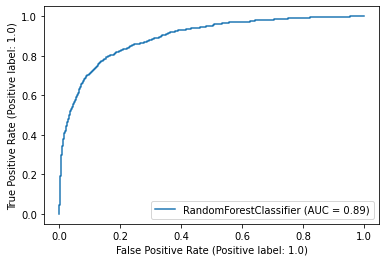

In [ ]:
rf_tuned = RandomForestClassifier(**rf_Grid.best_params_)
rf_tuned.fit(train_data, train_labels)
predictions = rf_tuned.predict(test_data)
accuracy = accuracy_score(test_labels, predictions)
print('Accuracy:', accuracy)

prob = rf_tuned.predict_proba(test_data)[:, 1]
auc = roc_auc_score(test_labels, prob)
print('AUC', auc)
RocCurveDisplay.from_estimator(rf_tuned, test_data, test_labels)
plt.show()

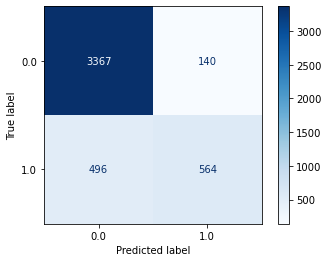

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

for model in [rf_tuned]:
    disp = ConfusionMatrixDisplay.from_estimator(model, 
                                                 test_data, 
                                                 test_labels, 
                                                 display_labels=rf.classes_,
                                                 cmap=plt.cm.Blues)
    
plt.show()

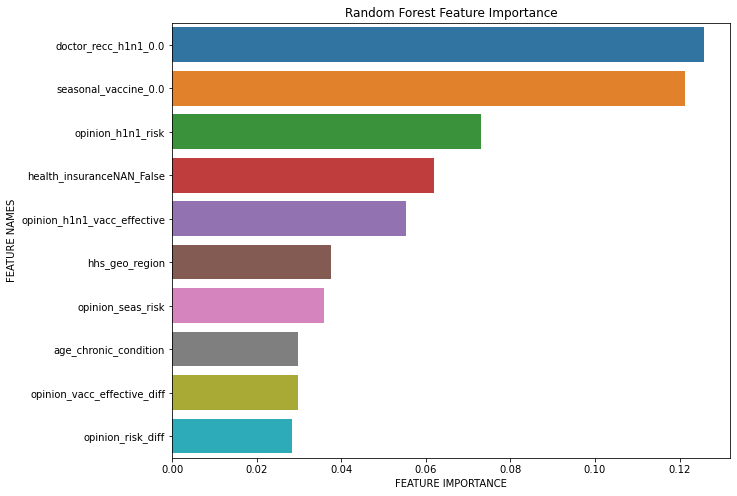

In [ ]:
plot_feature_importance(rf_tuned.feature_importances_, rf_tuned.feature_names_in_, "Random Forest")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param = {'class_weight': None,
  'max_depth': 17,
  'min_samples_leaf': 2,
  'min_samples_split': 6,
  'random_state': 42}
clf = RandomForestClassifier(**param)
# Train the model on the training data
clf.fit(X_train, y_train)
# Predict the target variable for the testing data
y_preds = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

eval_model()

ROC-AUC= 0.8943186403473378 
 PR-AUC= 0.7684740314480109 
 accuracy= 0.8613969783227502 
 report               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      3507
         1.0       0.80      0.54      0.64      1060

    accuracy                           0.86      4567
   macro avg       0.84      0.75      0.78      4567
weighted avg       0.86      0.86      0.85      4567
 
confusion matrix: 
 [[3366  141]
 [ 492  568]]


## Simple Neural Network (Multi-layer Perceptron)

In [ ]:
from sklearn.neural_network import MLPClassifier
# Default baseline
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=400, random_state=42)
mlp.fit(train_data, train_labels)

predictions = mlp.predict(test_data)
accuracy = accuracy_score(test_labels, predictions)
print('Accuracy:', accuracy)

prediction_proba = mlp.predict_proba(test_data)[:, 1]
roc_auc = roc_auc_score(test_labels, prediction_proba)
print('ROC-AUC:', roc_auc)

Accuracy: 0.8539522662579374
ROC-AUC: 0.8641520194113121


Fitting 5 folds for each of 10 candidates, totalling 50 fits


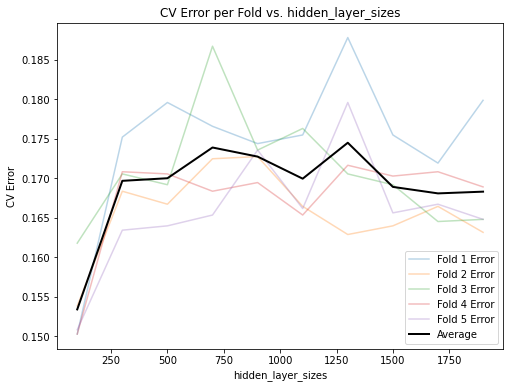

In [ ]:
grid_cv = MLPClassifier(max_iter=400, random_state=42)
param_range = np.arange(100,2100,200)
param_name = 'hidden_layer_sizes'
train = train_data
label = train_labels
plot_cv_error_per_foldM(grid_cv, param_range, param_name, train, label, cv=5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


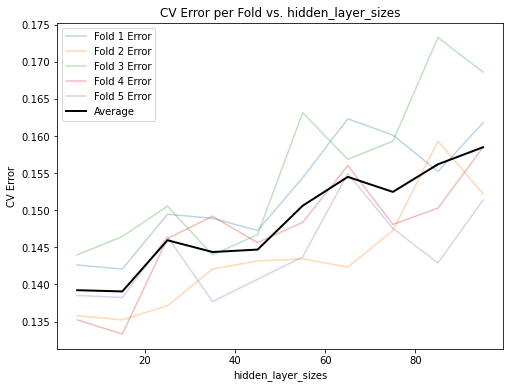

In [ ]:
# narrow down the range
grid_cv = MLPClassifier(max_iter=400, random_state=42)
param_range = np.arange(5, 100, 10)
param_name = 'hidden_layer_sizes'
train = train_data
label = train_labels
plot_cv_error_per_foldM(grid_cv, param_range, param_name, train, label, cv=5)

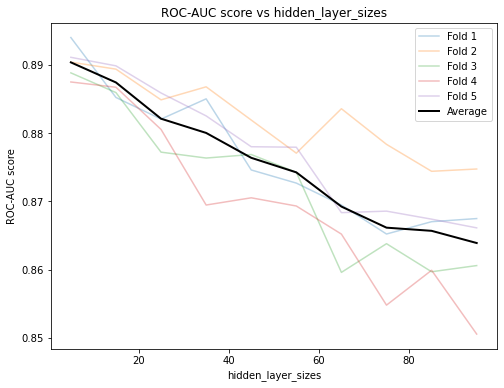

In [ ]:
classifier = MLPClassifier
params = {
    'hidden_layer_sizes': np.arange(5,100,10),
    'max_iter': 400,
    'random_state': 42}
param_name = 'hidden_layer_sizes'
plot_param_each_foldM(params, param_name, classifier, train, label)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


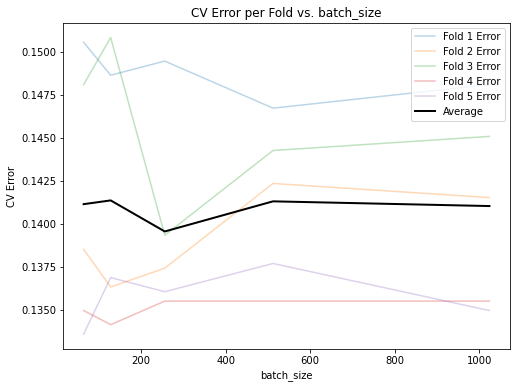

In [ ]:
grid_cv = MLPClassifier(max_iter=400, random_state=42, hidden_layer_sizes=(10,))
param_range = np.array([64,128,256,512,1024])
param_name = 'batch_size'

plot_cv_error_per_foldM(grid_cv, param_range, param_name, train, label, cv=5)

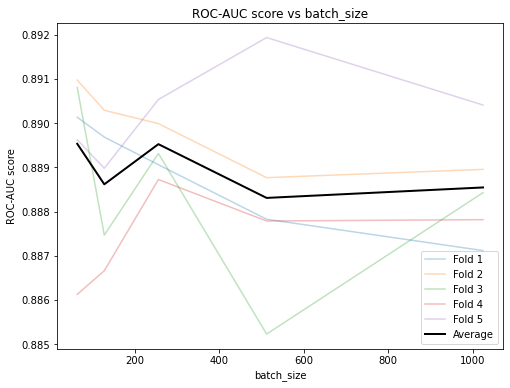

In [ ]:
params = {
    'hidden_layer_sizes': (10,),
    'batch_size': np.array([64,128,256,512,1024]),
    'max_iter': 400,
    'random_state': 42}
param_name = 'batch_size'
plot_param_each_foldM(params, param_name, classifier, train, label)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


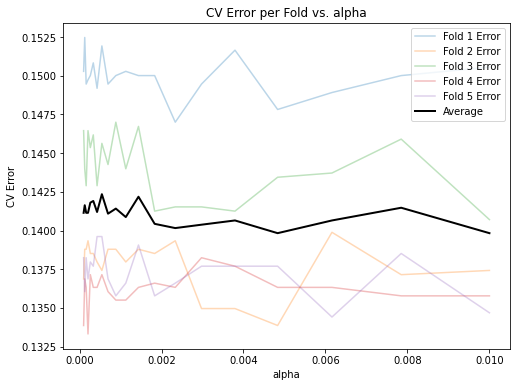

In [ ]:
grid_cv = MLPClassifier(max_iter=400, random_state=42, hidden_layer_sizes=(10,))
param_range = np.geomspace(1e-04,1e-02, 20)
param_name = 'alpha'

plot_cv_error_per_foldM(grid_cv, param_range, param_name, train, label, cv=5)

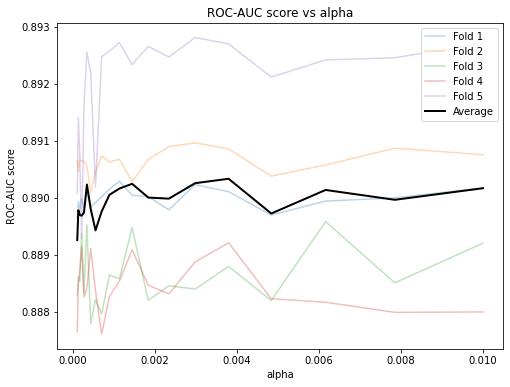

In [ ]:
params = {
    'hidden_layer_sizes': (10,),
    'alpha': np.geomspace(1e-04,1e-02, 20),
    'max_iter': 400,
    'random_state': 42}
param_name = 'alpha'
plot_param_each_foldM(params, param_name, classifier, train, label)

In [ ]:
# Define the set of hyperparameters to search through
grid = {
    # The number of layers
    'hidden_layer_sizes': np.arange(5,21),
    # Alpha for L2
    'alpha': np.geomspace(4e-03,1e-02,10),
    # Batch size
    'batch_size': np.array([256,512])
}

In [ ]:
# FUll grid search
import time
start_time = time.time()

nn_tuning = MLPClassifier(max_iter=700, random_state=42)
nn_Grid = GridSearchCV(estimator = nn_tuning,
                       param_grid = grid,
                       cv = 5, verbose=10, n_jobs = 6,
                       refit= 'accuracy',
                       scoring = ['accuracy', 'roc_auc'])
nn_Grid.fit(train_data, train_labels)
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
--- 2818.3323278427124 seconds ---


In [ ]:
# save
# joblib.dump(nn_Grid, "./neural_network_grid.joblib")

['./neural_network_grid.joblib']

In [ ]:
# load the model
nn_Grid = joblib.load(os.path.join(DIR_PATH, f"neural_network_grid.joblib"))
nn_Grid.best_params_

{'alpha': 0.008157721730960478, 'batch_size': 256, 'hidden_layer_sizes': 8}

In [ ]:
# nn_tuned = MLPClassifier(**nn_Grid.best_params_, max_iter=400)
# nn_tuned.fit(train_data, train_labels)
nn_tuned = nn_Grid.best_estimator_
predictions = nn_tuned.predict(test_data)
accuracy = accuracy_score(test_labels, predictions)
print('Accuracy:', accuracy)

prediction_proba = nn_tuned.predict_proba(test_data)[:, 1]
roc_auc = roc_auc_score(test_labels, prediction_proba)
print('ROC-AUC:', roc_auc)

Accuracy: 0.8616159404423035
ROC-AUC: 0.8920799909614734


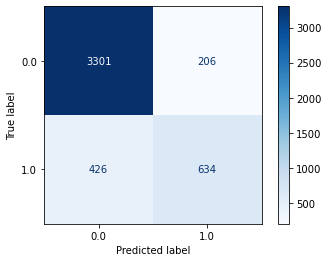

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(nn_tuned, 
                                             test_data, 
                                             test_labels, 
                                             display_labels=nn_tuned.classes_,
                                             cmap=plt.cm.Blues)

In [ ]:
from sklearn.neural_network import MLPClassifier
param = {'alpha': 0.008157721730960478, 'batch_size': 256, 'hidden_layer_sizes': 8,
         'random_state': 42}
clf = MLPClassifier(**param, max_iter=400)
# Train the model on the training data
clf.fit(X_train, y_train)
# Predict the target variable for the testing data
y_preds = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

eval_model()

ROC-AUC= 0.8928017280802277 
 PR-AUC= 0.762980423857864 
 accuracy= 0.8635865995182833 
 report               precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      3507
         1.0       0.77      0.59      0.67      1060

    accuracy                           0.86      4567
   macro avg       0.83      0.77      0.79      4567
weighted avg       0.86      0.86      0.86      4567
 
confusion matrix: 
 [[3323  184]
 [ 439  621]]


## Gradient Boosting (GBM)

Baseline Model

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_preds = gb.predict(X_test)
y_pred_proba = gb.predict_proba(X_test)[:, 1]

eval_model()

ROC-AUC= 0.8975929542532186 
 PR-AUC= 0.7686339895801706 
 accuracy= 0.8662141449529231 
 report               precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      3507
         1.0       0.78      0.59      0.67      1060

    accuracy                           0.87      4567
   macro avg       0.83      0.77      0.79      4567
weighted avg       0.86      0.87      0.86      4567
 
confusion matrix: 
 [[3329  178]
 [ 433  627]]


Random Search

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint

# define hyperparameter space
param_dist = {
    'n_estimators': np.arange(50, 300, 10),
    'learning_rate': np.linspace(0.01, 0.3, num=30),
    'max_depth': np.arange(3, 10),
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21),
    'max_features': np.arange(1, X_train.shape[1] + 1),
    'subsample': np.linspace(0.5, 1.0, num=50),
}

# create decision tree classifier
gbm = GradientBoostingClassifier(random_state=42)

# create RandomizedSearchCV object
random_search_gbm = RandomizedSearchCV(
    gbm,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42,
)

# fit the RandomizedSearchCV object to the data
random_search_gbm.fit(X_train, y_train)

# print the best hyperparameters and the associated model performance
print(random_search_gbm.best_params_)
print(random_search_gbm.best_score_)

# Save the grid search object to a file
joblib.dump(random_search_gbm, 'GBM/random_search_gbm.joblib')

# 2min30s with 250 fits


Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'subsample': 0.6836734693877551, 'n_estimators': 120, 'min_samples_split': 17, 'min_samples_leaf': 19, 'max_features': 12, 'max_depth': 6, 'learning_rate': 0.05999999999999999}
0.8643926886165199


['GBM/random_search_gbm.joblib']

In [ ]:
random_search_gbm = joblib.load(os.path.join(DIR_PATH, f'./GBM/random_search_gbm.joblib'))
random_search_gbm.best_params_

{'subsample': 0.6836734693877551,
 'n_estimators': 120,
 'min_samples_split': 17,
 'min_samples_leaf': 19,
 'max_features': 12,
 'max_depth': 6,
 'learning_rate': 0.05999999999999999}

In [14]:
#Create a Gaussian Classifier
gbm = GradientBoostingClassifier(
    n_estimators = 120,
    learning_rate= 0.05999999999999999,
    max_depth= 6,
    min_samples_split= 17,
    min_samples_leaf= 19,
    max_features = 12,
    subsample = 0.6836734693877551,
    random_state=42
    )

gbm.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_preds = gbm.predict(X_test)
y_pred_proba = gbm.predict_proba(X_test)[:, 1]
eval_model()

ROC-AUC= 0.8996613242517659 
 PR-AUC= 0.7745528297979549 
 accuracy= 0.8673089555506898 
 report               precision    recall  f1-score   support

         0.0       0.89      0.94      0.92      3507
         1.0       0.77      0.61      0.68      1060

    accuracy                           0.87      4567
   macro avg       0.83      0.78      0.80      4567
weighted avg       0.86      0.87      0.86      4567
 
confusion matrix: 
 [[3314  193]
 [ 413  647]]


Grid Search

**n_estimator**

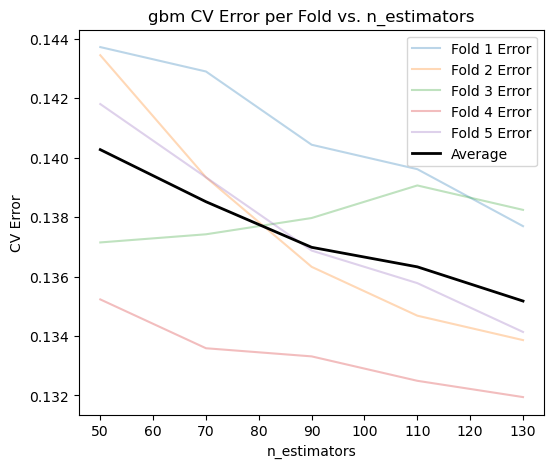

In [ ]:
# Example usage
from sklearn.ensemble import GradientBoostingClassifier

# Plot CV error per fold vs. max_depth
grid_cv = GradientBoostingClassifier(random_state=42)
param_range = np.arange(50, 150, 20)
param_name = 'n_estimators'
method = 'gbm'
plot_cv_error_per_fold(grid_cv, param_range, param_name, X_train, y_train, method, cv=5)

  0%|          | 0/5 [00:00<?, ?it/s]

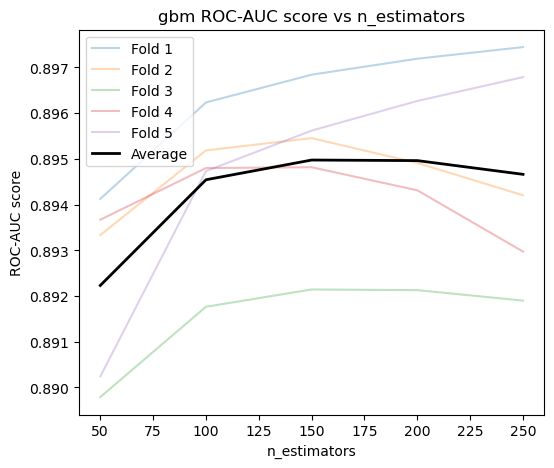

In [ ]:
# Plot ROC-AUC per fold vs. max_depth
params = {
    'n_estimators': np.arange(50, 300, 50),
    "random_state": 42
}
param_name = 'n_estimators'
method = 'gbm'
classifier = GradientBoostingClassifier
plot_param_each_fold(params, param_name, classifier, X_train, y_train, method)

**learning_rate**

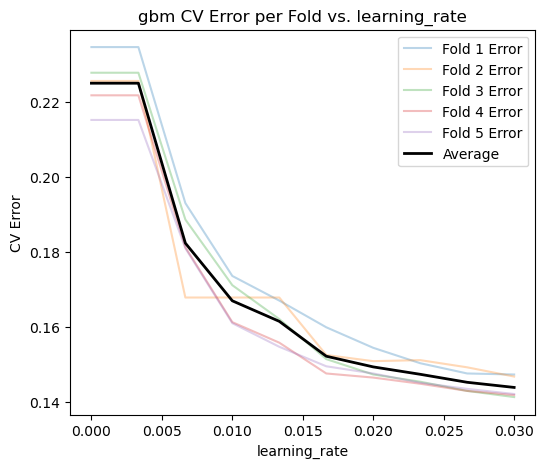

In [ ]:
# Example usage
from sklearn.ensemble import GradientBoostingClassifier

# Plot CV error per fold vs. max_depth
grid_cv = GradientBoostingClassifier(random_state=42)
param_range = np.linspace(0, 0.03, num=10)
param_name = 'learning_rate'
method = 'gbm'
plot_cv_error_per_fold(grid_cv, param_range, param_name, X_train, y_train, method, cv=5)

  0%|          | 0/50 [00:00<?, ?it/s]

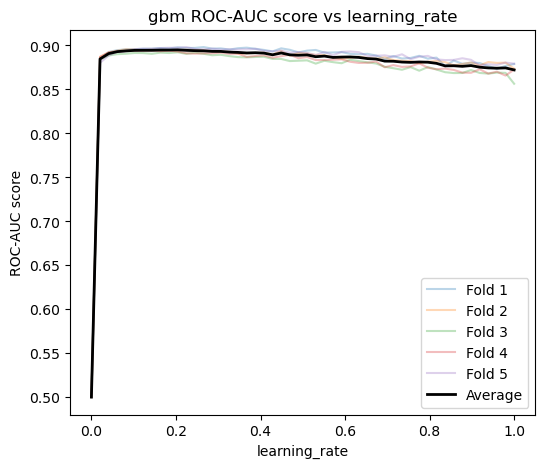

In [ ]:
# Plot ROC-AUC per fold vs. max_depth
params = {
    'learning_rate': np.linspace(0, 1, num=50),
    "random_state": 42
}
param_name = 'learning_rate'
method = 'gbm'
classifier = GradientBoostingClassifier
plot_param_each_fold(params, param_name, classifier, X_train, y_train, method)

  0%|          | 0/20 [00:00<?, ?it/s]

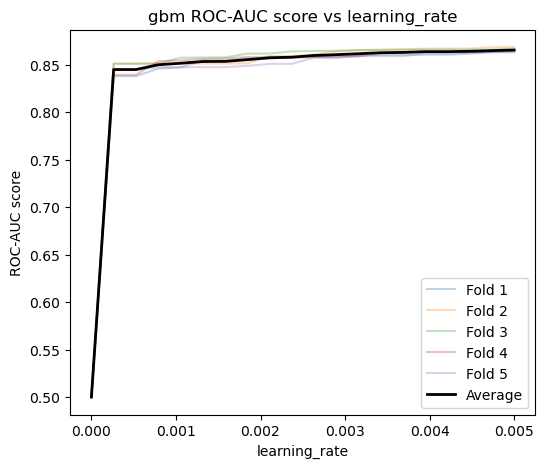

In [ ]:
params = {
    'learning_rate': np.linspace(0, 0.005, num=20),
    "random_state": 42
}
param_name = 'learning_rate'
method = 'gbm'
classifier = GradientBoostingClassifier
plot_param_each_fold(params, param_name, classifier, X_train, y_train, method)

**max_depth**

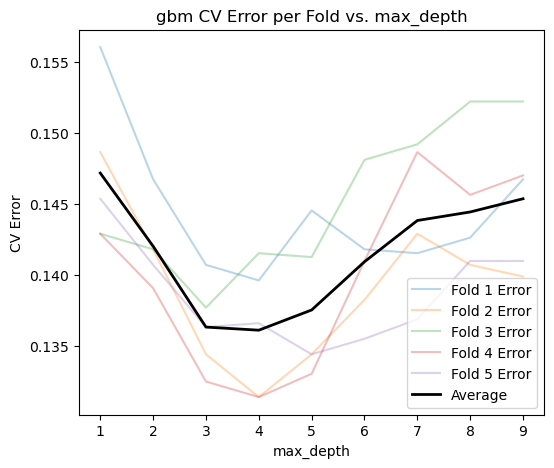

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Plot CV error per fold vs. max_depth
grid_cv = GradientBoostingClassifier(random_state=42)
param_range = np.arange(1,10)
param_name = 'max_depth'
method = 'gbm'
plot_cv_error_per_fold(grid_cv, param_range, param_name, X_train, y_train, method, cv=5)

  0%|          | 0/9 [00:00<?, ?it/s]

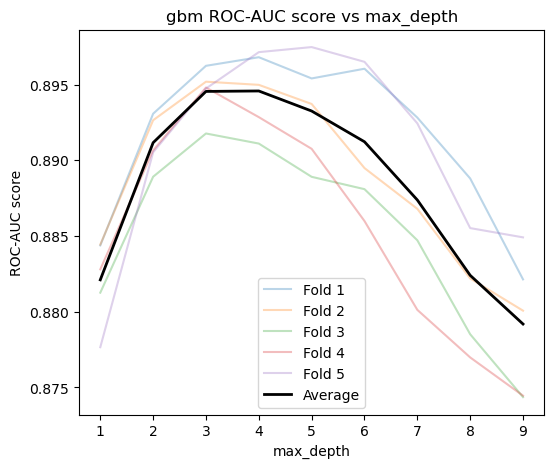

In [ ]:
params = {
    'max_depth': np.arange(1,10),
    "random_state": 42
}
param_name = 'max_depth'
method = 'gbm'
classifier = GradientBoostingClassifier
plot_param_each_fold(params, param_name, classifier, X_train, y_train, method)

**min_samples_split**

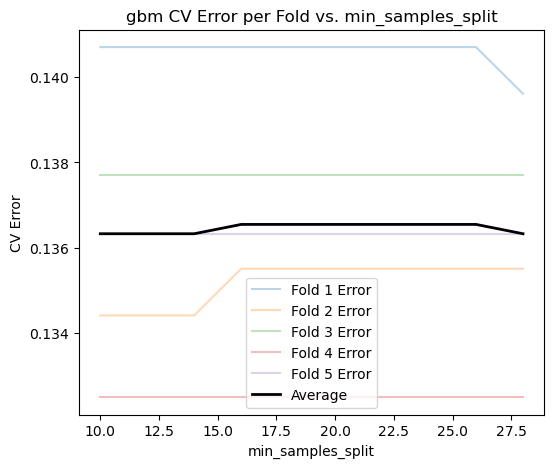

In [ ]:
# Example usage
from sklearn.ensemble import GradientBoostingClassifier

# Plot CV error per fold vs. max_depth
grid_cv = GradientBoostingClassifier(random_state=42)
param_range = np.arange(10, 30, 2)
param_name = 'min_samples_split'
method = 'gbm'
plot_cv_error_per_fold(grid_cv, param_range, param_name, X_train, y_train, method, cv=5)

  0%|          | 0/5 [00:00<?, ?it/s]

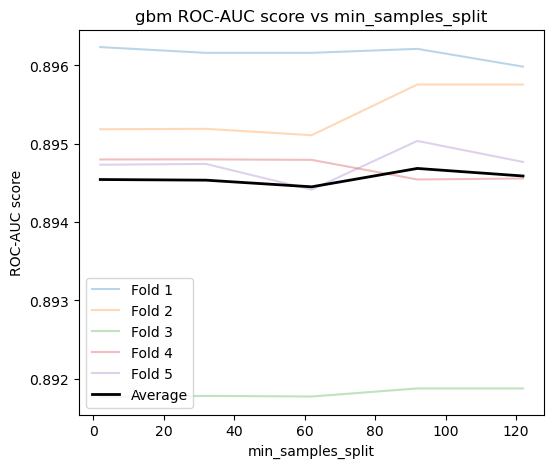

In [ ]:
params = {
    'min_samples_split': np.arange(2, 150, 30),
    "random_state": 42
}
param_name = 'min_samples_split'
method = 'gbm'
classifier = GradientBoostingClassifier
plot_param_each_fold(params, param_name, classifier, X_train, y_train, method)

**min_samples_leaf**

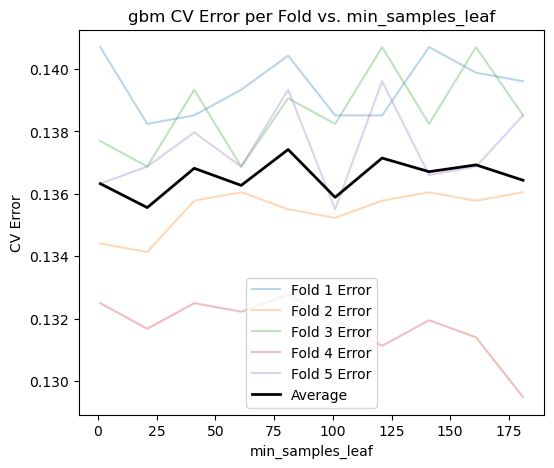

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Plot CV error per fold vs. max_depth
grid_cv = GradientBoostingClassifier(random_state=42)
param_range = np.arange(1, 200, 20)
param_name = 'min_samples_leaf'
method = 'gbm'
plot_cv_error_per_fold(grid_cv, param_range, param_name, X_train, y_train, method, cv=5)

  0%|          | 0/10 [00:00<?, ?it/s]

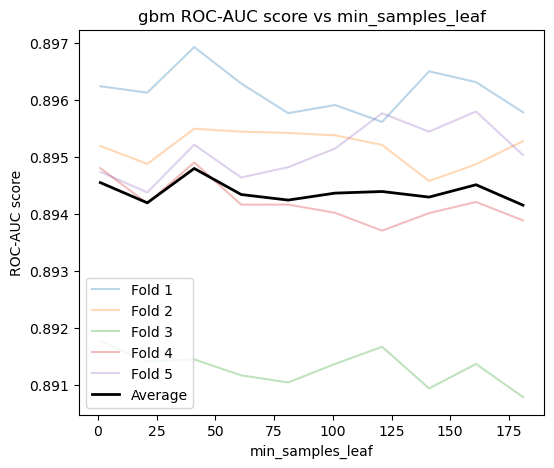

In [ ]:
params = {
    'min_samples_leaf': np.arange(1, 200, 20),
    "random_state": 42
}
param_name = 'min_samples_leaf'
method = 'gbm'
classifier = GradientBoostingClassifier
plot_param_each_fold(params, param_name, classifier, X_train, y_train, method)

**max_features**

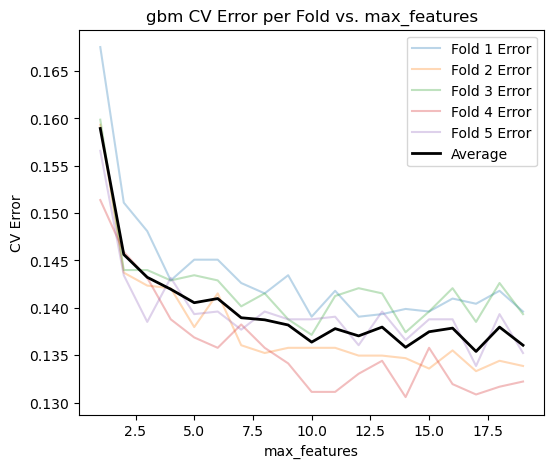

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Plot CV error per fold vs. max_depth
grid_cv = GradientBoostingClassifier(random_state=42)
param_range = np.arange(1, 20)
param_name = 'max_features'
method = 'gbm'
plot_cv_error_per_fold(grid_cv, param_range, param_name, X_train, y_train, method, cv=5)

  0%|          | 0/19 [00:00<?, ?it/s]

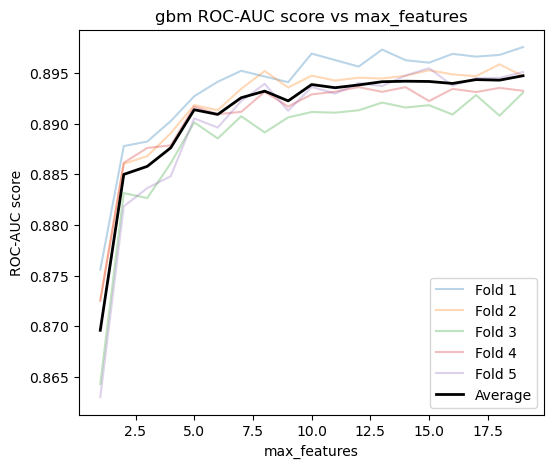

In [ ]:
params = {
    'max_features': np.arange(1, 20),
    "random_state": 42
}
param_name = 'max_features'
method = 'gbm'
classifier = GradientBoostingClassifier
plot_param_each_fold(params, param_name, classifier, X_train, y_train, method)

**subsample**

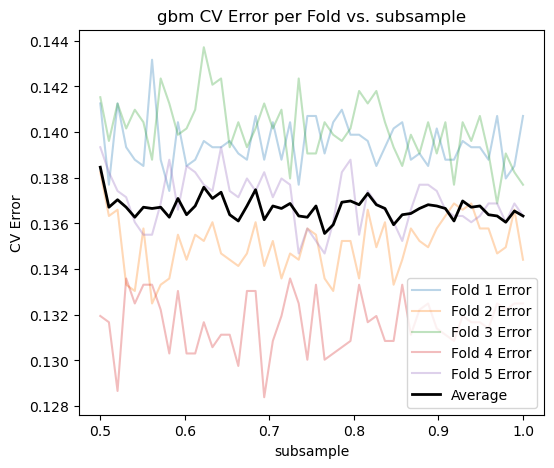

In [ ]:
grid_cv = GradientBoostingClassifier(random_state=42)
param_range = np.linspace(0.5, 1.0, num=50)
param_name = 'subsample'
method = 'gbm'
plot_cv_error_per_fold(grid_cv, param_range, param_name, X_train, y_train, method, cv=5)

  0%|          | 0/50 [00:00<?, ?it/s]

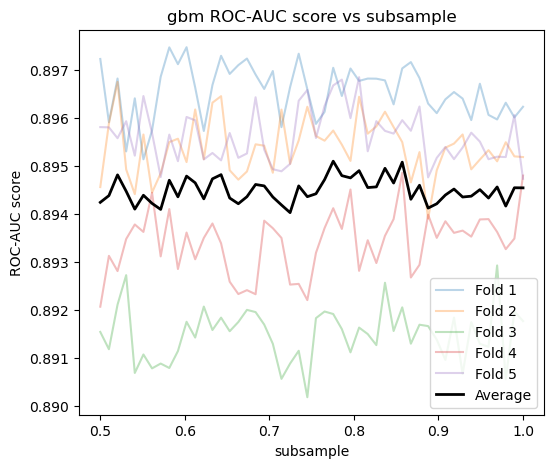

In [ ]:
params = {
    'subsample': np.linspace(0.5, 1.0, num=50),
    "random_state": 42
}
param_name = 'subsample'
method = 'gbm'
classifier = GradientBoostingClassifier
plot_param_each_fold(params, param_name, classifier, X_train, y_train, method)
# 7mins

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import joblib

n_features = X_train.shape[1]

param_grid = {
    'n_estimators': [120],
    'learning_rate': np.linspace(0.01, 0.2, num=20),
    'max_depth': np.arange(3, 6),
    # 'min_samples_split': np.arange(random_search_gbm.best_params_['min_samples_split'] - 2, 
    # random_search_gbm.best_params_['min_samples_split'] + 2),
    # 'min_samples_leaf': np.arange(random_search_gbm.best_params_['min_samples_leaf'] - 2, 
    # random_search_gbm.best_params_['min_samples_leaf'] + 2),
    'max_features': [np.arange(5, 12), 'sqrt', 'log2', None],
    'subsample': np.linspace(0.65, 0.8, num=5)
}


# initialize the classifier
gbm = GradientBoostingClassifier(random_state=42)

# initialize the grid search
grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy',verbose=1)

# fit the grid search to the data
grid_search_gbm.fit(X_train, y_train)

# print the best parameters and the corresponding score
print("Best parameters: ", grid_search_gbm.best_params_)
print("Best score: ", grid_search_gbm.best_score_)

# Save the grid search object to a file

joblib.dump(grid_search_gbm, 'GBM/grid_search_gbm.joblib')
# 71 mins


Fitting 5 folds for each of 6000 candidates, totalling 30000 fits


/Users/sherry/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
7500 fits failed out of a total of 30000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3104 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sherry/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherry/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/Users/sherry/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constra

Best parameters:  {'learning_rate': 0.17, 'max_depth': 3, 'max_features': None, 'n_estimators': 120, 'subsample': 0.65}
Best score:  0.8657541746509718


['GBM/grid_search_gbm.joblib']

In [ ]:
import joblib
# Load the grid search object from a file
grid_search_gbm = joblib.load(os.path.join(DIR_PATH, f'./GBM/grid_search_gbm.joblib'))
grid_search_gbm.best_params_

{'learning_rate': 0.17,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 120,
 'subsample': 0.65}

ROC-AUC= 0.8971103614872679 
 PR-AUC= 0.7670924349426027 
 accuracy= 0.8659951828333698 
 report               precision    recall  f1-score   support

         0.0       0.89      0.94      0.92      3507
         1.0       0.77      0.60      0.68      1060

    accuracy                           0.87      4567
   macro avg       0.83      0.77      0.80      4567
weighted avg       0.86      0.87      0.86      4567
 
confusion matrix: 
 [[3314  193]
 [ 419  641]]


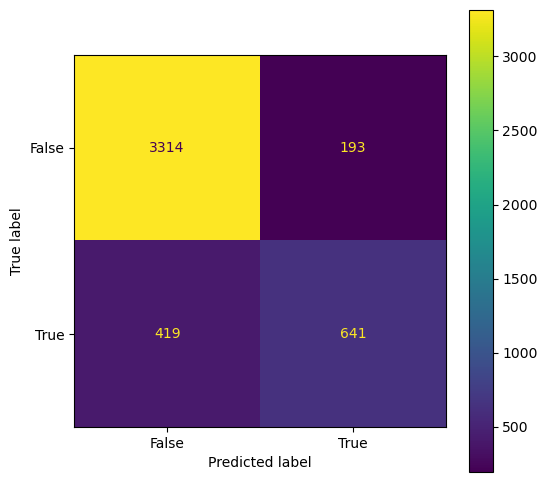

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators = 120,
    learning_rate= 0.17,
    max_depth= 3,
    min_samples_split= 12,
    min_samples_leaf= 3,
    max_features = None,
    subsample = 0.65,
    random_state=42
    )

gb.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_preds = gb.predict(X_test)
y_pred_proba = gb.predict_proba(X_test)[:, 1]
eval_model()

cm = confusion_matrix(y_test, y_preds)

# Plot the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.gcf().set_size_inches(6, 6)
plt.savefig('GBM/gbm_tune_cm.png')
plt.show()

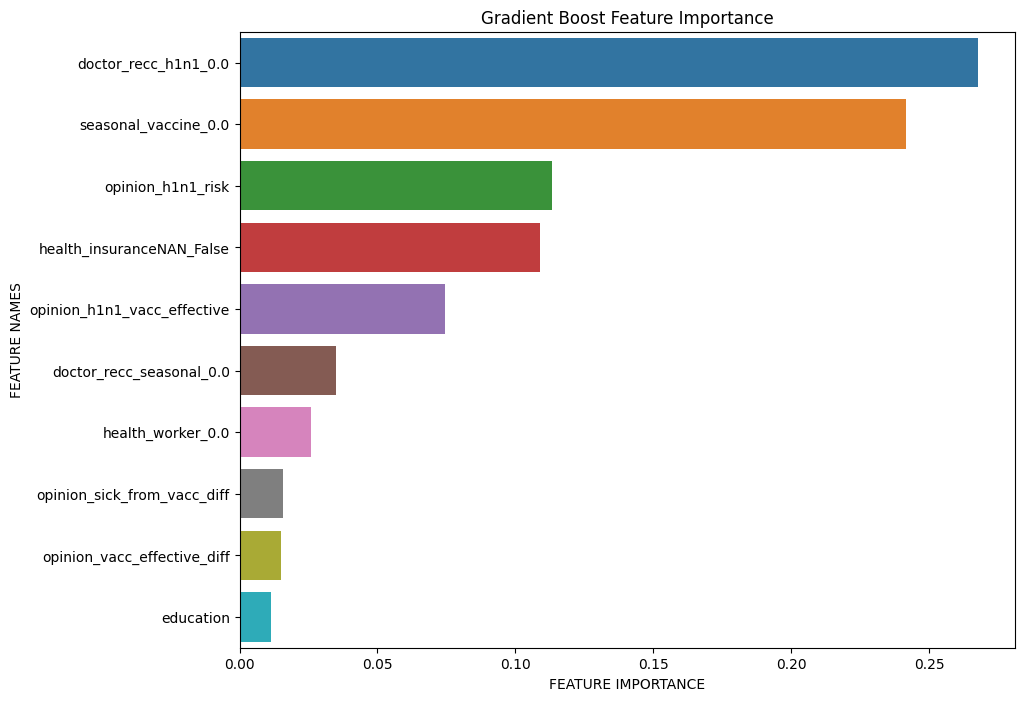

In [ ]:
importances = gb.feature_importances_
feature_names = X_train.columns
plot_feature_importance(importances, feature_names, 'Gradient Boost')

## XGBoost

In [ ]:
import re
feature_names = X_train.columns.tolist()
clean_feature_names = [re.sub("[\[\]<]", "_", fn) for fn in feature_names]
X_train.columns = clean_feature_names
X_test.columns = clean_feature_names

In [ ]:
counts_precentages = pd.Series(y_train).value_counts() / len(y_train)
scale_pos_weight = counts_precentages[0] / counts_precentages[1]
params = {
    'max_depth': list(range(1, 20)),
    'tree_method': 'gpu_hist',
    'scale_pos_weight': scale_pos_weight,
    'random_state':42
}
param_name = 'max_depth'
classifier = xgb.XGBClassifier
# Best parameter is  2
# plot_param_each_fold("XGBoost", params, param_name, classifier, X_train, y_train)

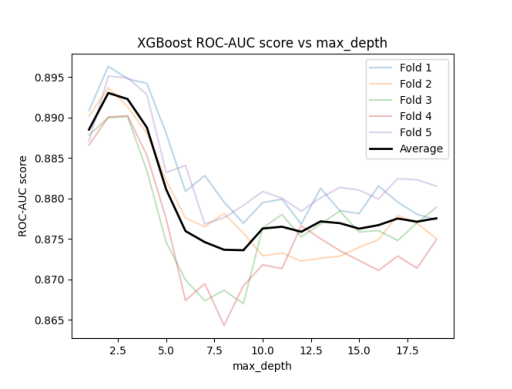

In [ ]:
%matplotlib inline
img=plt.imread(os.path.join(DIR_PATH_Plot,'XGBoost/XGBoost ROC-AUC score vs max_depth.png'))
plt.axis('off')
plt.imshow(img)
plt.show()

In [ ]:
params = {
    'learning_rate': [x/100 for x in list(range(1,50))],
    'tree_method': 'gpu_hist',
    'scale_pos_weight': scale_pos_weight,
    'random_state':42
}
param_name = 'learning_rate'
classifier = xgb.XGBClassifier
# plot_param_each_fold("XGBoost", params, param_name, classifier, X_train, y_train)
# Best parameter is  0.05

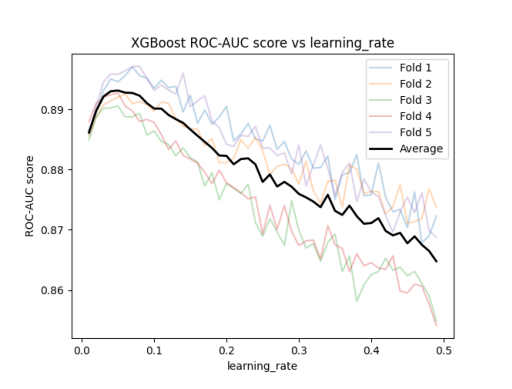

In [ ]:
%matplotlib inline
img=plt.imread(os.path.join(DIR_PATH_Plot,'XGBoost/XGBoost ROC-AUC score vs learning_rate.png'))
plt.axis('off')
plt.imshow(img)
plt.show()

In [ ]:
import joblib
from sklearn.model_selection import GridSearchCV

In [ ]:
# counts_precentages = pd.Series(y_train).value_counts() / len(y_train)
# scale_pos_weight = counts_precentages[0] / counts_precentages[1]
# param_grid = {
#     'learning_rate': [0.025,0.05,0.1,0.2],
#     'n_estimators': [10,25,50,100,200,400,800,1600],
#     'max_depth': [2, 3, 5, 7],
#     'tree_method': ['gpu_hist'],
#     'scale_pos_weight': [scale_pos_weight],
#     'random_state':[42]
# }
# XGB_classifier = xgb.XGBClassifier()
# grid_search_xgb = GridSearchCV(estimator=XGB_classifier, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
# grid_search_xgb.fit(X_train, y_train)

# print("Best parameters: ", grid_search_xgb.best_params_)
# print("Best score: ", grid_search_xgb.best_score_)

# joblib.dump(grid_search_xgb, 'grid_search_xgb.joblib')
# Best parameters:  {'learning_rate': 0.025, 'max_depth': 3, 'n_estimators': 800, 'random_state': 42, 'scale_pos_weight': 3.4451204672669746, 'tree_method': 'gpu_hist'}
# Best score:  0.8948288971783753

In [ ]:
grid_search_xgb = joblib.load(os.path.join(DIR_PATH, f"grid_search_xgb.joblib"))
print("Best parameters: ", grid_search_xgb.best_params_)
print("Best score: ", grid_search_xgb.best_score_)

Best parameters:  {'learning_rate': 0.025, 'max_depth': 3, 'n_estimators': 800, 'random_state': 42, 'scale_pos_weight': 3.4451204672669746, 'tree_method': 'gpu_hist'}
Best score:  0.8948288971783753


In [ ]:
# param = {'learning_rate': 0.025, 'max_depth': 3, 'n_estimators': 800, 'random_state': 42, 'scale_pos_weight': 3.4451204672669746, 'tree_method': 'gpu_hist'}
# XGB_classifier = xgb.XGBClassifier(**param)

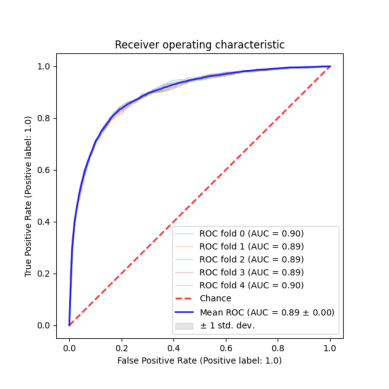

In [ ]:
# rocCurveKCV("XGBoost",XGB_classifier, X_train, y_train, n_splits=5)
%matplotlib inline
img=plt.imread(os.path.join(DIR_PATH_Plot,'XGBoost/XGBoost_roc_cv.png'))
plt.axis('off')
plt.imshow(img)
plt.show()

In [ ]:
param = {'learning_rate': 0.025, 'max_depth': 3, 'n_estimators': 800, 'random_state': 42, 'scale_pos_weight': 3.4451204672669746, 'tree_method': 'gpu_hist'}
clf = xgb.XGBClassifier(**param)
# Train the model on the training data
clf.fit(X_train, y_train)
# Predict the target variable for the testing data
y_preds = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

eval_model()

ROC-AUC= 0.8975647088572181 
 PR-AUC= 0.7680431820675666 
 accuracy= 0.8313991679439457 
 report               precision    recall  f1-score   support

         0.0       0.93      0.84      0.88      3507
         1.0       0.60      0.80      0.69      1060

    accuracy                           0.83      4567
   macro avg       0.77      0.82      0.79      4567
weighted avg       0.86      0.83      0.84      4567
 
confusion matrix: 
 [[2946  561]
 [ 209  851]]


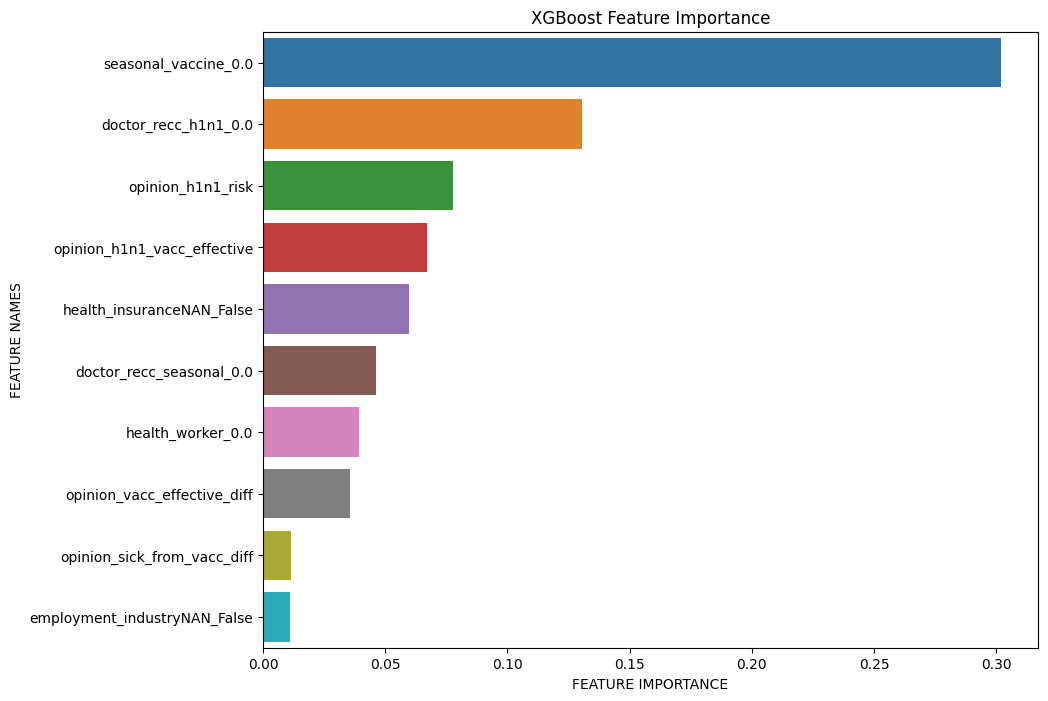

In [ ]:
importances = clf.feature_importances_
feature_names = X_train.columns
plot_feature_importance(importances, feature_names, 'XGBoost')